# 1. Understand the Business Requirements

**Problem statement:**  `To recognise mines and rocks, find the optimal machine learning model for the problem.`

In [56]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import read_csv, set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
sonar_df=pd.read_csv('~/Downloads/sonar.all-data.csv')

In [58]:
 #first five rows
sonar_df.head()

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.0078  R  
2  0.0040  0.0117  R  
3  0.0107  0.0094  R  
4  0.0051  0.0062  R  

[5 rows x 61 columns]

In [59]:
# Rows and columns
sonar_df.shape

(207, 61)

In [60]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [61]:
# numerical columns
sonar_df.select_dtypes(include=np.number)

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  \
0    0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
1    0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
2    0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
3    0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   
4    0.3039  ...  0.0104  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
202  0.2684  ...  0.0203  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065   
203  0.2154  ...  0.0051  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034   
204  0.2529  ...  0.0155  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140   
205  0.2354  ...  0.0042  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034   
206  0.2354  ...  0.0181  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040   

     0.0084  0.0090  0.0032  
0    0.0049  0.0052  0.0044  
1    0.0164  0.0095  0.0078  
2    0.0044  0.0040  0.0117  
3    0.0048  0.0107  0.0094  
4    0.0027  0.0051  0.0062  
..      ...     ...     ...  
202  0.0115  0.0193  0.0157  
203  0.0032  0.0062  0.0067  
204  0.0138  0.0077  0.0031  
205  0.0079  0.0036  0.0048  
206  0.0036  0.0061  0.0115  

[207 rows x 60 columns]

In [62]:
# numerical columns
sonar_df.select_dtypes(include=np.number).columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032'],
      dtype='object')

In [63]:
# numerical columns
len(sonar_df.select_dtypes(include=np.number).columns)

# ther are 60 columns are numerical in our dataset

60

In [64]:
# categorical columns
sonar_df.select_dtypes(include=object)

R
0    R
1    R
2    R
3    R
4    R
..  ..
202  M
203  M
204  M
205  M
206  M

[207 rows x 1 columns]

In [65]:
# categorical columns
sonar_df.select_dtypes(include=object).columns

Index(['R'], dtype='object')

In [66]:
len(# categorical columns
sonar_df.select_dtypes(include=object).columns)

# there are only one categorical columns which is our target that include R>> rock and M>>mine

1

In [67]:
# 5 point summary for numerical variables
sonar_df.describe()

0.0200      0.0371      0.0428      0.0207      0.0954      0.0986  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.029208    0.038443    0.043837    0.054053    0.075105    0.104599   
std      0.023038    0.033040    0.038521    0.046583    0.055669    0.059247   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013300    0.016400    0.018900    0.024450    0.037700    0.066950   
50%      0.022800    0.030800    0.034200    0.044100    0.062000    0.092100   
75%      0.035800    0.048100    0.058200    0.065700    0.101050    0.134150   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

           0.1539      0.1601      0.3109      0.2111  ...      0.0232  \
count  207.000000  207.000000  207.000000  207.000000  ...  207.000000   
mean     0.121591    0.134677    0.177361    0.208245  ...    0.016034   
std      0.061897    0.085340    0.118311    0.134741  ...    0.012027   
min      0.003300    0.005500    0.007500    0.011300  ...    0.000000   
25%      0.080600    0.080350    0.096750    0.111150  ...    0.008350   
50%      0.105600    0.111900    0.152200    0.181000  ...    0.013800   
75%      0.153050    0.169800    0.231500    0.269000  ...    0.020700   
max      0.372900    0.459000    0.682800    0.710600  ...    0.100400   

           0.0027      0.0065      0.0159      0.0072      0.0167      0.0180  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean     0.013472    0.010729    0.010917    0.009300    0.008181    0.007771   
std      0.009628    0.007071    0.007310    0.007103    0.005719    0.005756   
min      0.000800    0.000500    0.001000    0.000600    0.000400    0.000300   
25%      0.007350    0.005050    0.005350    0.004100    0.004400    0.003700   
50%      0.011500    0.009600    0.009300    0.007500    0.006800    0.005900   
75%      0.016750    0.014900    0.014450    0.012100    0.010350    0.010350   
max      0.070900    0.039000    0.035200    0.044700    0.039400    0.035500   

           0.0084      0.0090      0.0032  
count  207.000000  207.000000  207.000000  
mean     0.007947    0.007936    0.006523  
std      0.006485    0.006196    0.005038  
min      0.000300    0.000100    0.000600  
25%      0.003600    0.003650    0.003100  
50%      0.005800    0.006300    0.005300  
75%      0.010400    0.010350    0.008550  
max      0.044000    0.036400    0.043900  

[8 rows x 60 columns]

In [68]:
sonar_df.select_dtypes(include=object).describe()

R
count   207
unique    2
top       M
freq    111

In [69]:
sonar_df.R.unique()

array(['R', 'M'], dtype=object)

In [70]:
sonar_df.R.value_counts()
 # majority in target variable are mines(M)

M    111
R     96
Name: R, dtype: int64

In [71]:
# lets calculate mean of every columns according to rock & mine
sonar_df.groupby('R').mean()

0.0200    0.0371    0.0428    0.0207    0.0954    0.0986    0.1539  \
R                                                                         
M  0.034989  0.045544  0.050720  0.064768  0.086715  0.111864  0.128359   
R  0.022524  0.030232  0.035879  0.041664  0.061680  0.096199  0.113767   

     0.1601    0.3109    0.2111  ...    0.0232    0.0027    0.0065    0.0159  \
R                                ...                                           
M  0.149832  0.213492  0.251022  ...  0.019352  0.016014  0.011643  0.012185   
R  0.117153  0.135584  0.158785  ...  0.012198  0.010533  0.009673  0.009451   

     0.0072    0.0167    0.0180    0.0084    0.0090    0.0032  
R                                                              
M  0.009923  0.008914  0.007825  0.009060  0.008695  0.006930  
R  0.008581  0.007333  0.007708  0.006659  0.007058  0.006053  

[2 rows x 60 columns]

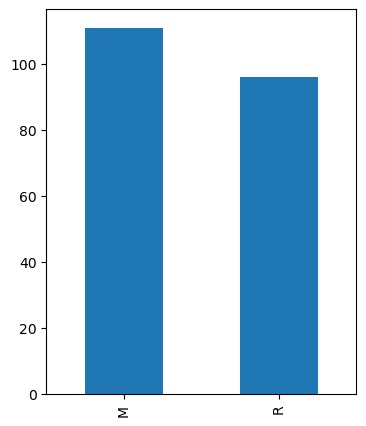

In [72]:
plt.rcParams['figure.figsize']=[4,5]
sonar_df.R.value_counts().plot(kind='bar')
plt.show()

 # majority in target variable are mines(M) but diffrence are minor

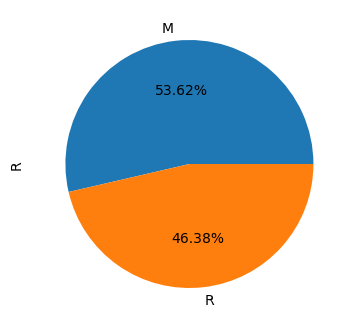

In [73]:
plt.rcParams['figure.figsize']=[4,5]
sonar_df.R.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()


In [74]:
# lets check for null values

sonar_df.isnull().sum().sum()

# there are no null values are present in our dataset
# so there are no null value treatment required


0

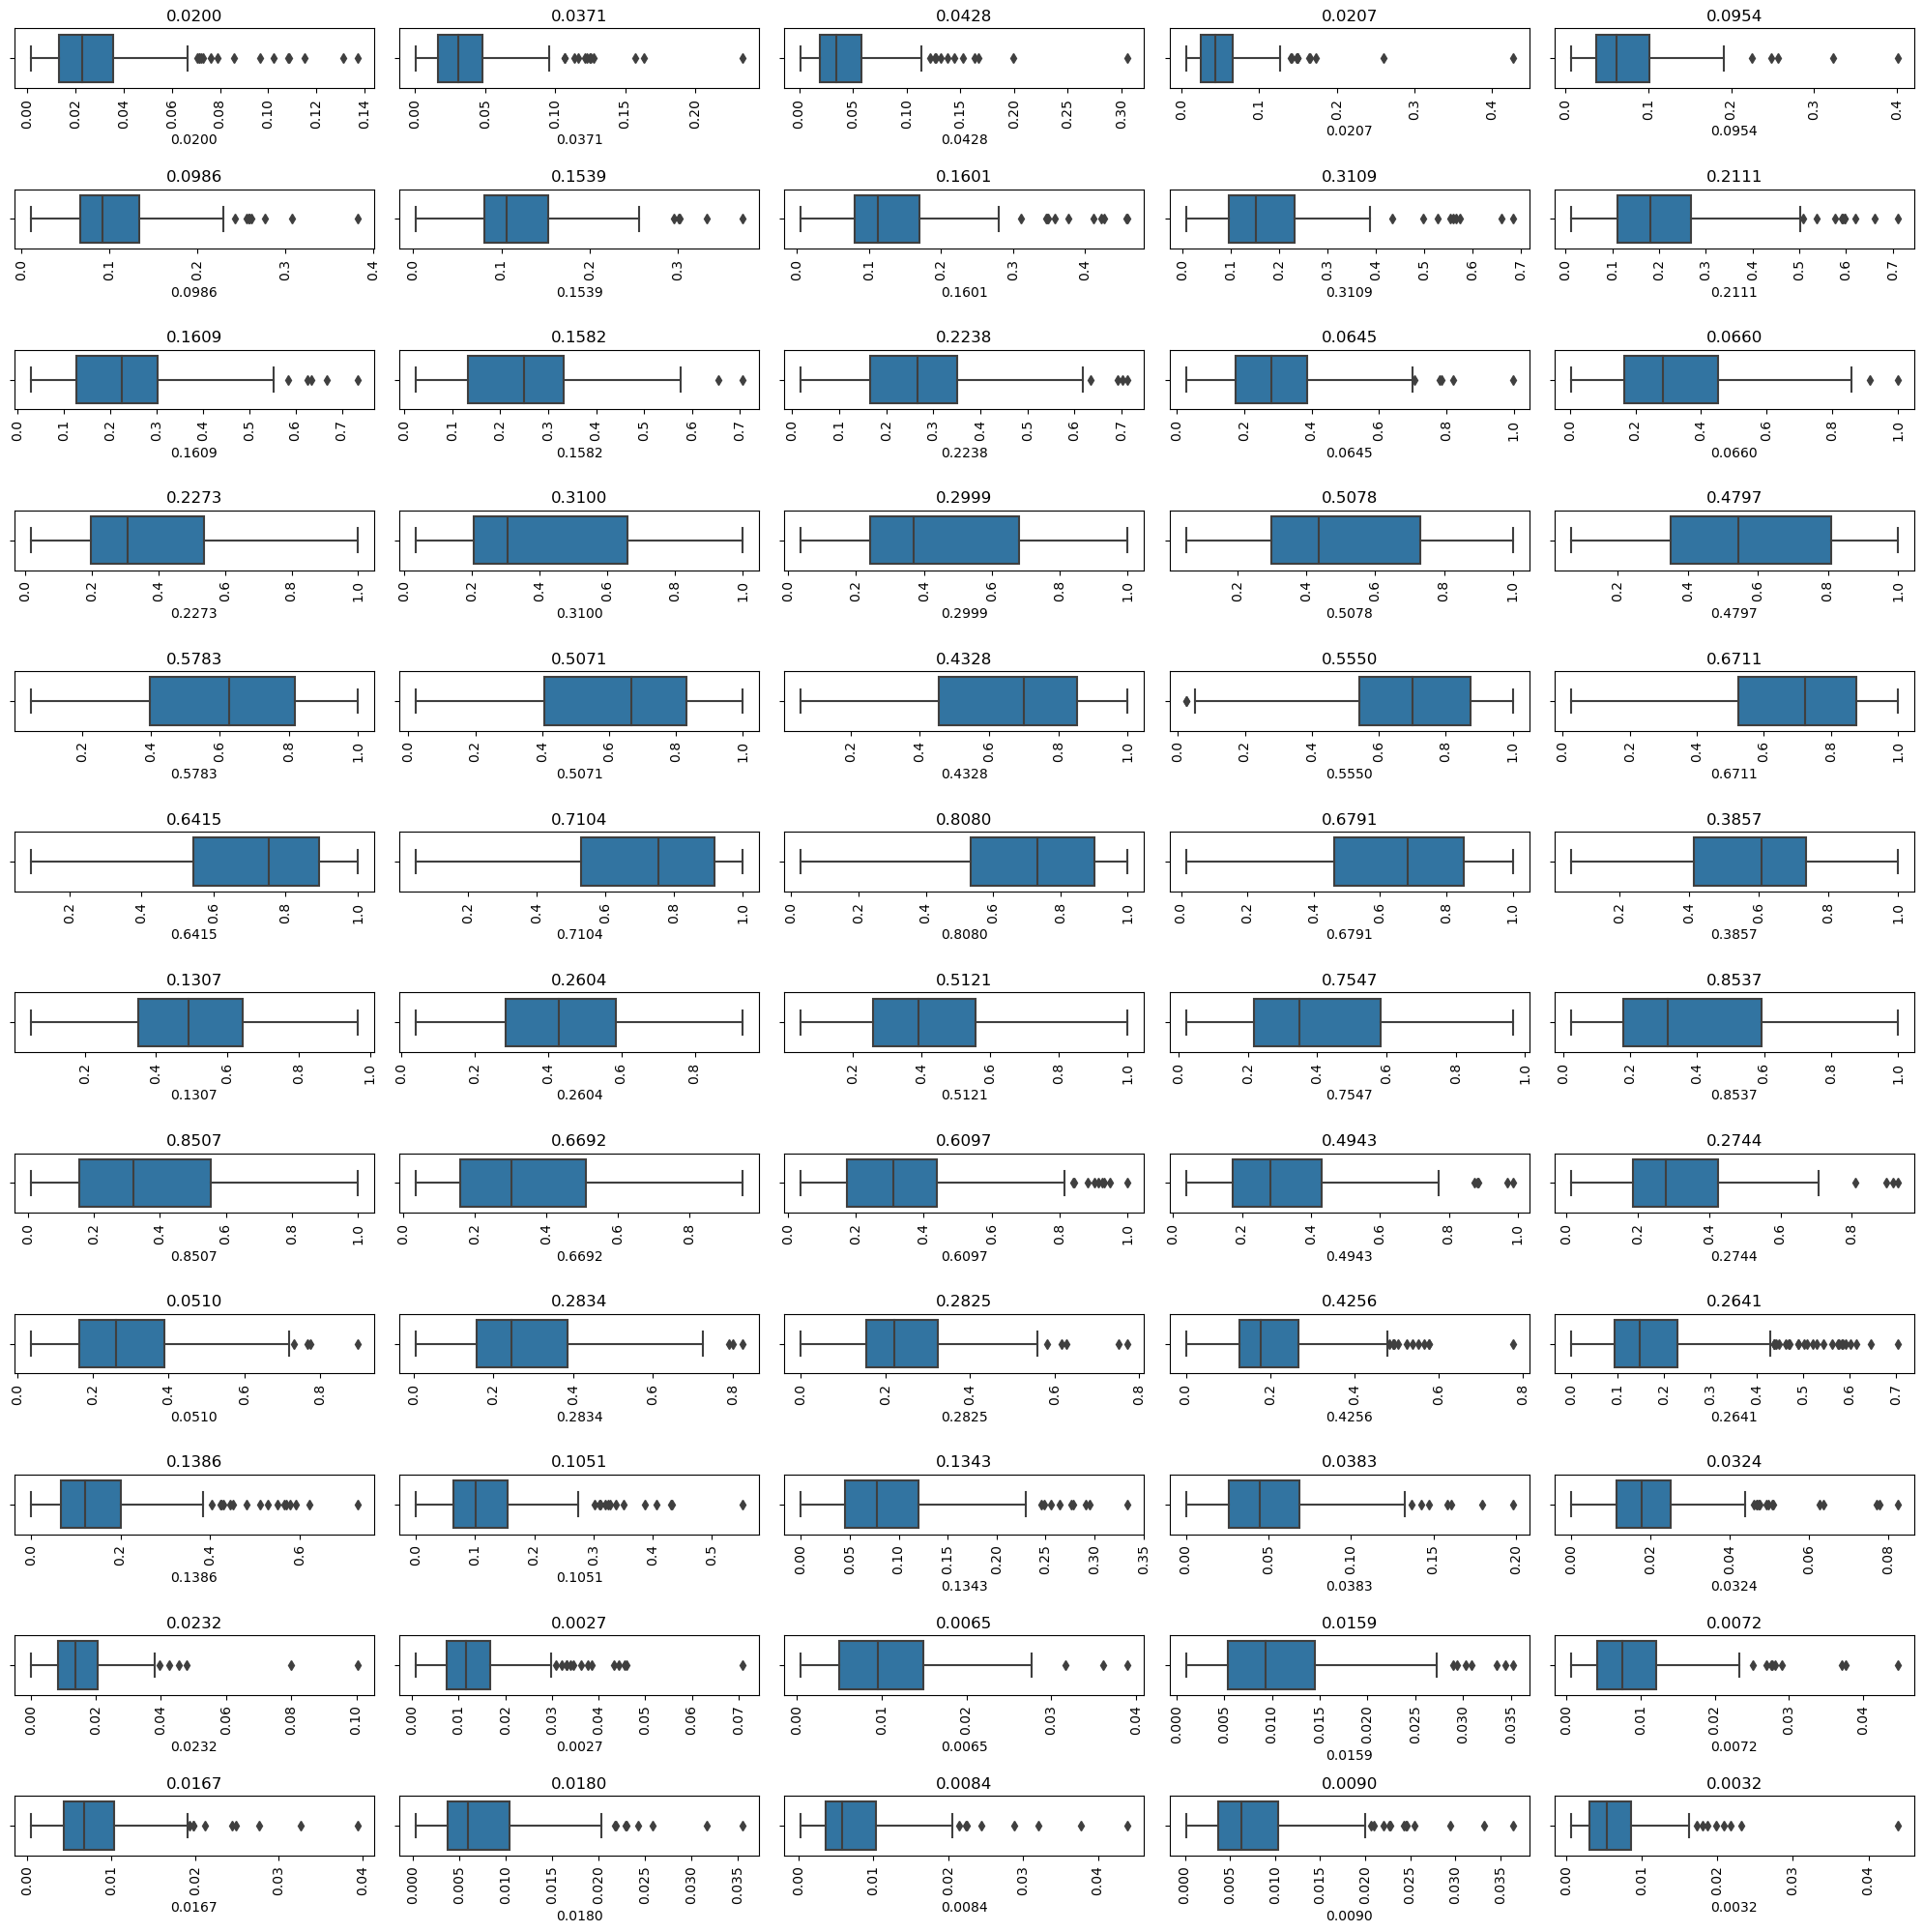

In [75]:
# lets check for outliers
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[20,20]
num_cols=sonar_df.select_dtypes(include=np.number).columns
a=12
b=5
c=1
for i in num_cols:
    plt.subplot(a,b,c)
    sns.boxplot(sonar_df[i])
    c+=1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
    
    

In [76]:
sonar_df.corr()

0.0200    0.0371    0.0428    0.0207    0.0954    0.0986    0.1539  \
0.0200  1.000000  0.736104  0.571706  0.490853  0.345744  0.238824  0.262095   
0.0371  0.736104  1.000000  0.779915  0.607297  0.419877  0.332319  0.279328   
0.0428  0.571706  0.779915  1.000000  0.782662  0.546365  0.346271  0.190628   
0.0207  0.490853  0.607297  0.782662  1.000000  0.729338  0.352901  0.248713   
0.0954  0.345744  0.419877  0.546365  0.729338  1.000000  0.597438  0.334831   
0.0986  0.238824  0.332319  0.346271  0.352901  0.597438  1.000000  0.703624   
0.1539  0.262095  0.279328  0.190628  0.248713  0.334831  0.703624  1.000000   
0.1601  0.356312  0.334747  0.237974  0.248131  0.203590  0.471942  0.675612   
0.3109  0.356822  0.317929  0.253615  0.252048  0.176522  0.329145  0.469490   
0.2111  0.318440  0.270787  0.219641  0.238136  0.183240  0.288639  0.425675   
0.1609  0.343362  0.297186  0.274751  0.270466  0.232939  0.333560  0.398590   
0.1582  0.209891  0.194177  0.214947  0.173502  0.213108  0.344499  0.276563   
0.2238  0.210187  0.249602  0.258799  0.214868  0.299892  0.411068  0.366629   
0.0645  0.254880  0.274222  0.292960  0.283544  0.363429  0.397477  0.415424   
0.0660  0.303731  0.308506  0.286569  0.275610  0.321543  0.368683  0.416642   
0.2273  0.238158  0.261986  0.237176  0.246552  0.330316  0.353836  0.365342   
0.3100  0.137174  0.152151  0.201120  0.222172  0.327420  0.293115  0.251303   
0.2999  0.040739  0.042791  0.120611  0.193372  0.300639  0.235693  0.209840   
0.5078  0.055271  0.040913  0.099304  0.189679  0.340632  0.226316  0.215607   
0.4797  0.156244  0.102391  0.103101  0.187496  0.286459  0.206741  0.197476   
0.5783  0.117482  0.075235  0.063977  0.142038  0.205372  0.174720  0.166244   
0.5071 -0.057911 -0.074285 -0.026889  0.034484  0.153833  0.123611  0.065006   
0.4328 -0.165441 -0.179855 -0.073643 -0.032812  0.075604  0.063777  0.011550   
0.5550 -0.219258 -0.196682 -0.085495 -0.104871  0.000244  0.026801  0.013242   
0.6711 -0.295832 -0.295307 -0.214258 -0.206990 -0.067287 -0.043290 -0.057140   
0.6415 -0.343524 -0.365852 -0.292049 -0.292614 -0.125299 -0.100447 -0.125553   
0.7104 -0.341771 -0.337041 -0.263108 -0.294998 -0.169732 -0.129082 -0.179730   
0.8080 -0.223621 -0.234424 -0.256756 -0.254868 -0.215730 -0.118479 -0.118205   
0.6791 -0.198889 -0.228474 -0.290725 -0.300331 -0.284242 -0.156018 -0.130176   
0.3857 -0.079322 -0.115695 -0.197985 -0.240418 -0.272394 -0.151912 -0.066077   
0.1307 -0.052157 -0.056627 -0.107223 -0.197847 -0.212904 -0.055406 -0.093287   
0.2604 -0.032132 -0.049933 -0.110192 -0.173397 -0.172355 -0.052435 -0.114024   
0.5121 -0.031078 -0.108237 -0.170699 -0.163345 -0.201565 -0.144243 -0.128363   
0.7547  0.034467 -0.003970 -0.099771 -0.079244 -0.144098 -0.069987 -0.082016   
0.8537  0.102391  0.117078  0.017420  0.021555 -0.090396 -0.028161 -0.020195   
0.8507  0.084810  0.133974  0.053707  0.045794 -0.077203 -0.022930 -0.001489   
0.6692  0.122558  0.170108  0.108122  0.068247 -0.067150 -0.064429 -0.004612   
0.6097  0.213242  0.218599  0.130954  0.094765 -0.010904 -0.048314  0.062985   
0.4943  0.210456  0.187321  0.110802  0.092552  0.062042  0.031069  0.078993   
0.2744  0.099643  0.098320  0.074118  0.044487  0.062006  0.081028  0.113280   
0.0510  0.125258  0.188844  0.189761  0.141260  0.101802  0.075472  0.044829   
0.2834  0.213733  0.261353  0.233447  0.144978  0.125168  0.048780 -0.028816   
0.2825  0.206671  0.186450  0.113973  0.051597  0.063280  0.034513 -0.026402   
0.4256  0.162076  0.134153  0.072598 -0.002933  0.028961  0.049955  0.057788   
0.2641  0.281062  0.285939  0.180877  0.089504  0.088494  0.085727  0.109823   
0.1386  0.319180  0.304236  0.173640  0.079546  0.082286  0.029446  0.077009   
0.1051  0.230068  0.255784  0.179520  0.045478  0.041789  0.016545  0.099504   
0.1343  0.204877  0.265719  0.235256  0.123738  0.083345  0.067612  0.153763   
0.0383  0.247008  0.314031  0.223103  0.132191  0.088856  0.080573  0.195874   
0.0324  0.

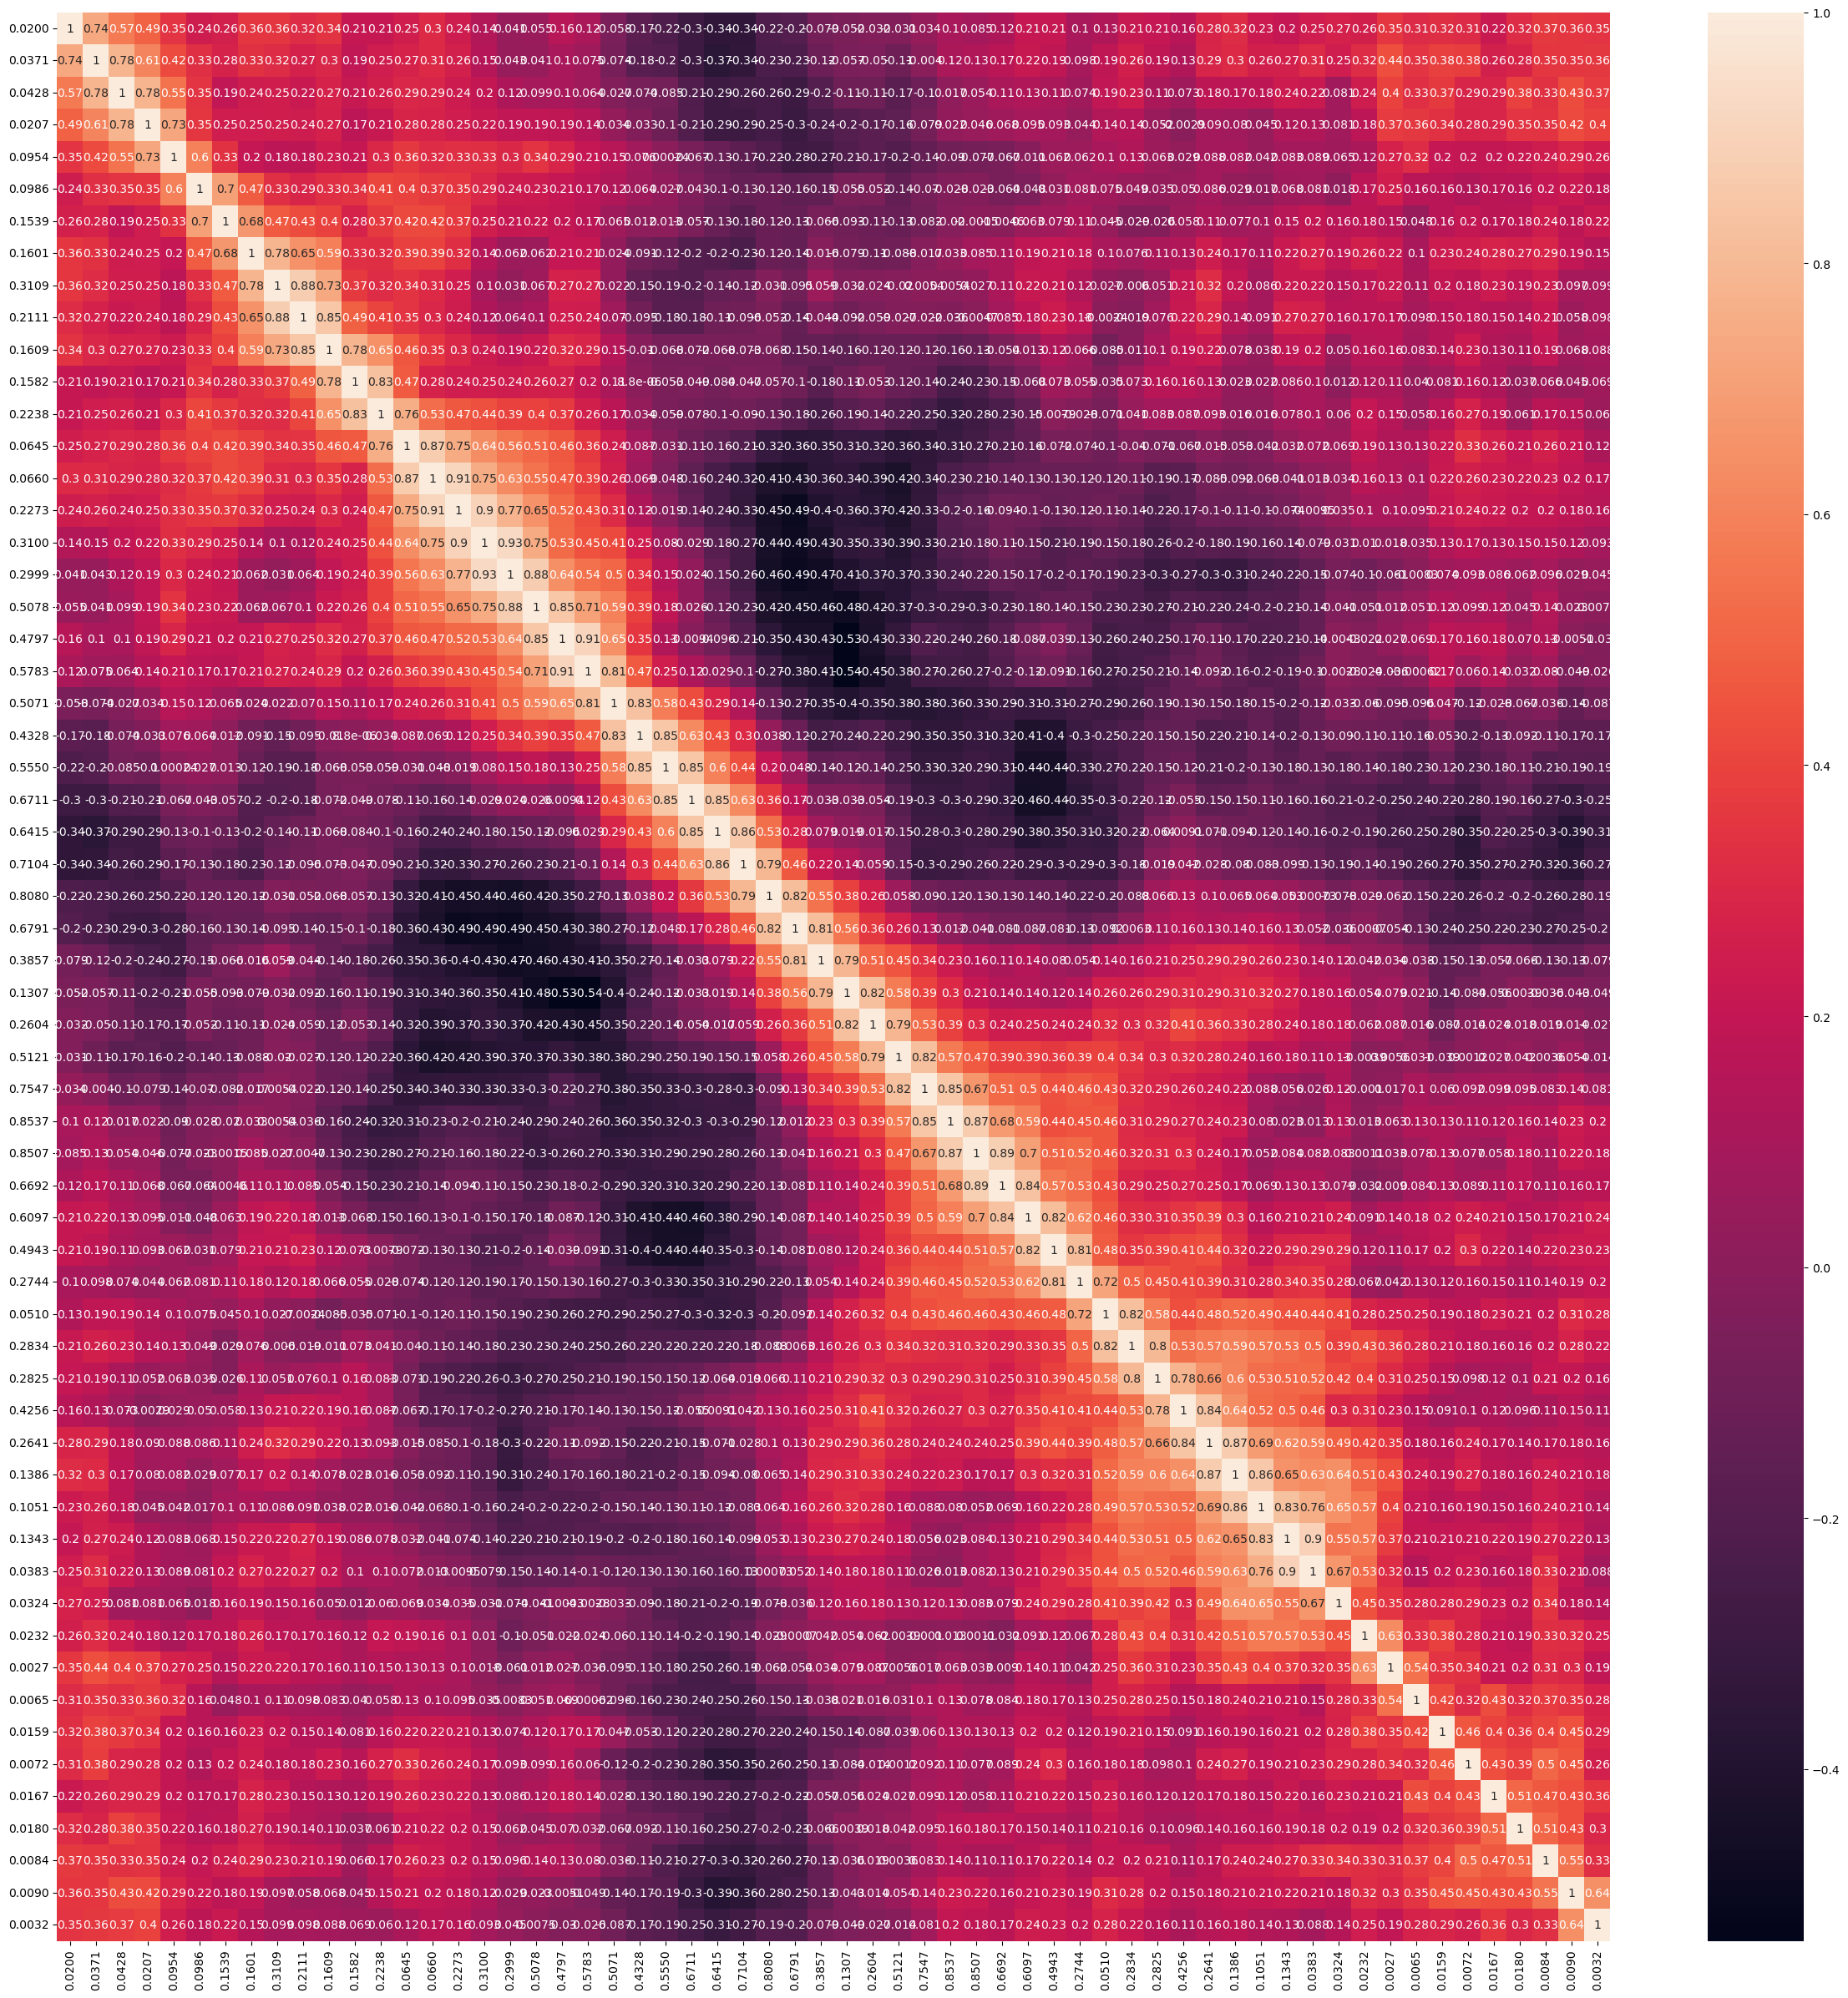

In [77]:
plt.rcParams['figure.figsize']=[30,30]
cols=sonar_df[['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032','R']]
corr=cols.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [78]:
corr=cols.corr()
corr

0.0200    0.0371    0.0428    0.0207    0.0954    0.0986    0.1539  \
0.0200  1.000000  0.736104  0.571706  0.490853  0.345744  0.238824  0.262095   
0.0371  0.736104  1.000000  0.779915  0.607297  0.419877  0.332319  0.279328   
0.0428  0.571706  0.779915  1.000000  0.782662  0.546365  0.346271  0.190628   
0.0207  0.490853  0.607297  0.782662  1.000000  0.729338  0.352901  0.248713   
0.0954  0.345744  0.419877  0.546365  0.729338  1.000000  0.597438  0.334831   
0.0986  0.238824  0.332319  0.346271  0.352901  0.597438  1.000000  0.703624   
0.1539  0.262095  0.279328  0.190628  0.248713  0.334831  0.703624  1.000000   
0.1601  0.356312  0.334747  0.237974  0.248131  0.203590  0.471942  0.675612   
0.3109  0.356822  0.317929  0.253615  0.252048  0.176522  0.329145  0.469490   
0.2111  0.318440  0.270787  0.219641  0.238136  0.183240  0.288639  0.425675   
0.1609  0.343362  0.297186  0.274751  0.270466  0.232939  0.333560  0.398590   
0.1582  0.209891  0.194177  0.214947  0.173502  0.213108  0.344499  0.276563   
0.2238  0.210187  0.249602  0.258799  0.214868  0.299892  0.411068  0.366629   
0.0645  0.254880  0.274222  0.292960  0.283544  0.363429  0.397477  0.415424   
0.0660  0.303731  0.308506  0.286569  0.275610  0.321543  0.368683  0.416642   
0.2273  0.238158  0.261986  0.237176  0.246552  0.330316  0.353836  0.365342   
0.3100  0.137174  0.152151  0.201120  0.222172  0.327420  0.293115  0.251303   
0.2999  0.040739  0.042791  0.120611  0.193372  0.300639  0.235693  0.209840   
0.5078  0.055271  0.040913  0.099304  0.189679  0.340632  0.226316  0.215607   
0.4797  0.156244  0.102391  0.103101  0.187496  0.286459  0.206741  0.197476   
0.5783  0.117482  0.075235  0.063977  0.142038  0.205372  0.174720  0.166244   
0.5071 -0.057911 -0.074285 -0.026889  0.034484  0.153833  0.123611  0.065006   
0.4328 -0.165441 -0.179855 -0.073643 -0.032812  0.075604  0.063777  0.011550   
0.5550 -0.219258 -0.196682 -0.085495 -0.104871  0.000244  0.026801  0.013242   
0.6711 -0.295832 -0.295307 -0.214258 -0.206990 -0.067287 -0.043290 -0.057140   
0.6415 -0.343524 -0.365852 -0.292049 -0.292614 -0.125299 -0.100447 -0.125553   
0.7104 -0.341771 -0.337041 -0.263108 -0.294998 -0.169732 -0.129082 -0.179730   
0.8080 -0.223621 -0.234424 -0.256756 -0.254868 -0.215730 -0.118479 -0.118205   
0.6791 -0.198889 -0.228474 -0.290725 -0.300331 -0.284242 -0.156018 -0.130176   
0.3857 -0.079322 -0.115695 -0.197985 -0.240418 -0.272394 -0.151912 -0.066077   
0.1307 -0.052157 -0.056627 -0.107223 -0.197847 -0.212904 -0.055406 -0.093287   
0.2604 -0.032132 -0.049933 -0.110192 -0.173397 -0.172355 -0.052435 -0.114024   
0.5121 -0.031078 -0.108237 -0.170699 -0.163345 -0.201565 -0.144243 -0.128363   
0.7547  0.034467 -0.003970 -0.099771 -0.079244 -0.144098 -0.069987 -0.082016   
0.8537  0.102391  0.117078  0.017420  0.021555 -0.090396 -0.028161 -0.020195   
0.8507  0.084810  0.133974  0.053707  0.045794 -0.077203 -0.022930 -0.001489   
0.6692  0.122558  0.170108  0.108122  0.068247 -0.067150 -0.064429 -0.004612   
0.6097  0.213242  0.218599  0.130954  0.094765 -0.010904 -0.048314  0.062985   
0.4943  0.210456  0.187321  0.110802  0.092552  0.062042  0.031069  0.078993   
0.2744  0.099643  0.098320  0.074118  0.044487  0.062006  0.081028  0.113280   
0.0510  0.125258  0.188844  0.189761  0.141260  0.101802  0.075472  0.044829   
0.2834  0.213733  0.261353  0.233447  0.144978  0.125168  0.048780 -0.028816   
0.2825  0.206671  0.186450  0.113973  0.051597  0.063280  0.034513 -0.026402   
0.4256  0.162076  0.134153  0.072598 -0.002933  0.028961  0.049955  0.057788   
0.2641  0.281062  0.285939  0.180877  0.089504  0.088494  0.085727  0.109823   
0.1386  0.319180  0.304236  0.173640  0.079546  0.082286  0.029446  0.077009   
0.1051  0.230068  0.255784  0.179520  0.045478  0.041789  0.016545  0.099504   
0.1343  0.204877  0.265719  0.235256  0.123738  0.083345  0.067612  0.153763   
0.0383  0.247008  0.314031  0.223103  0.132191  0.088856  0.080573  0.195874   
0.0324  0.

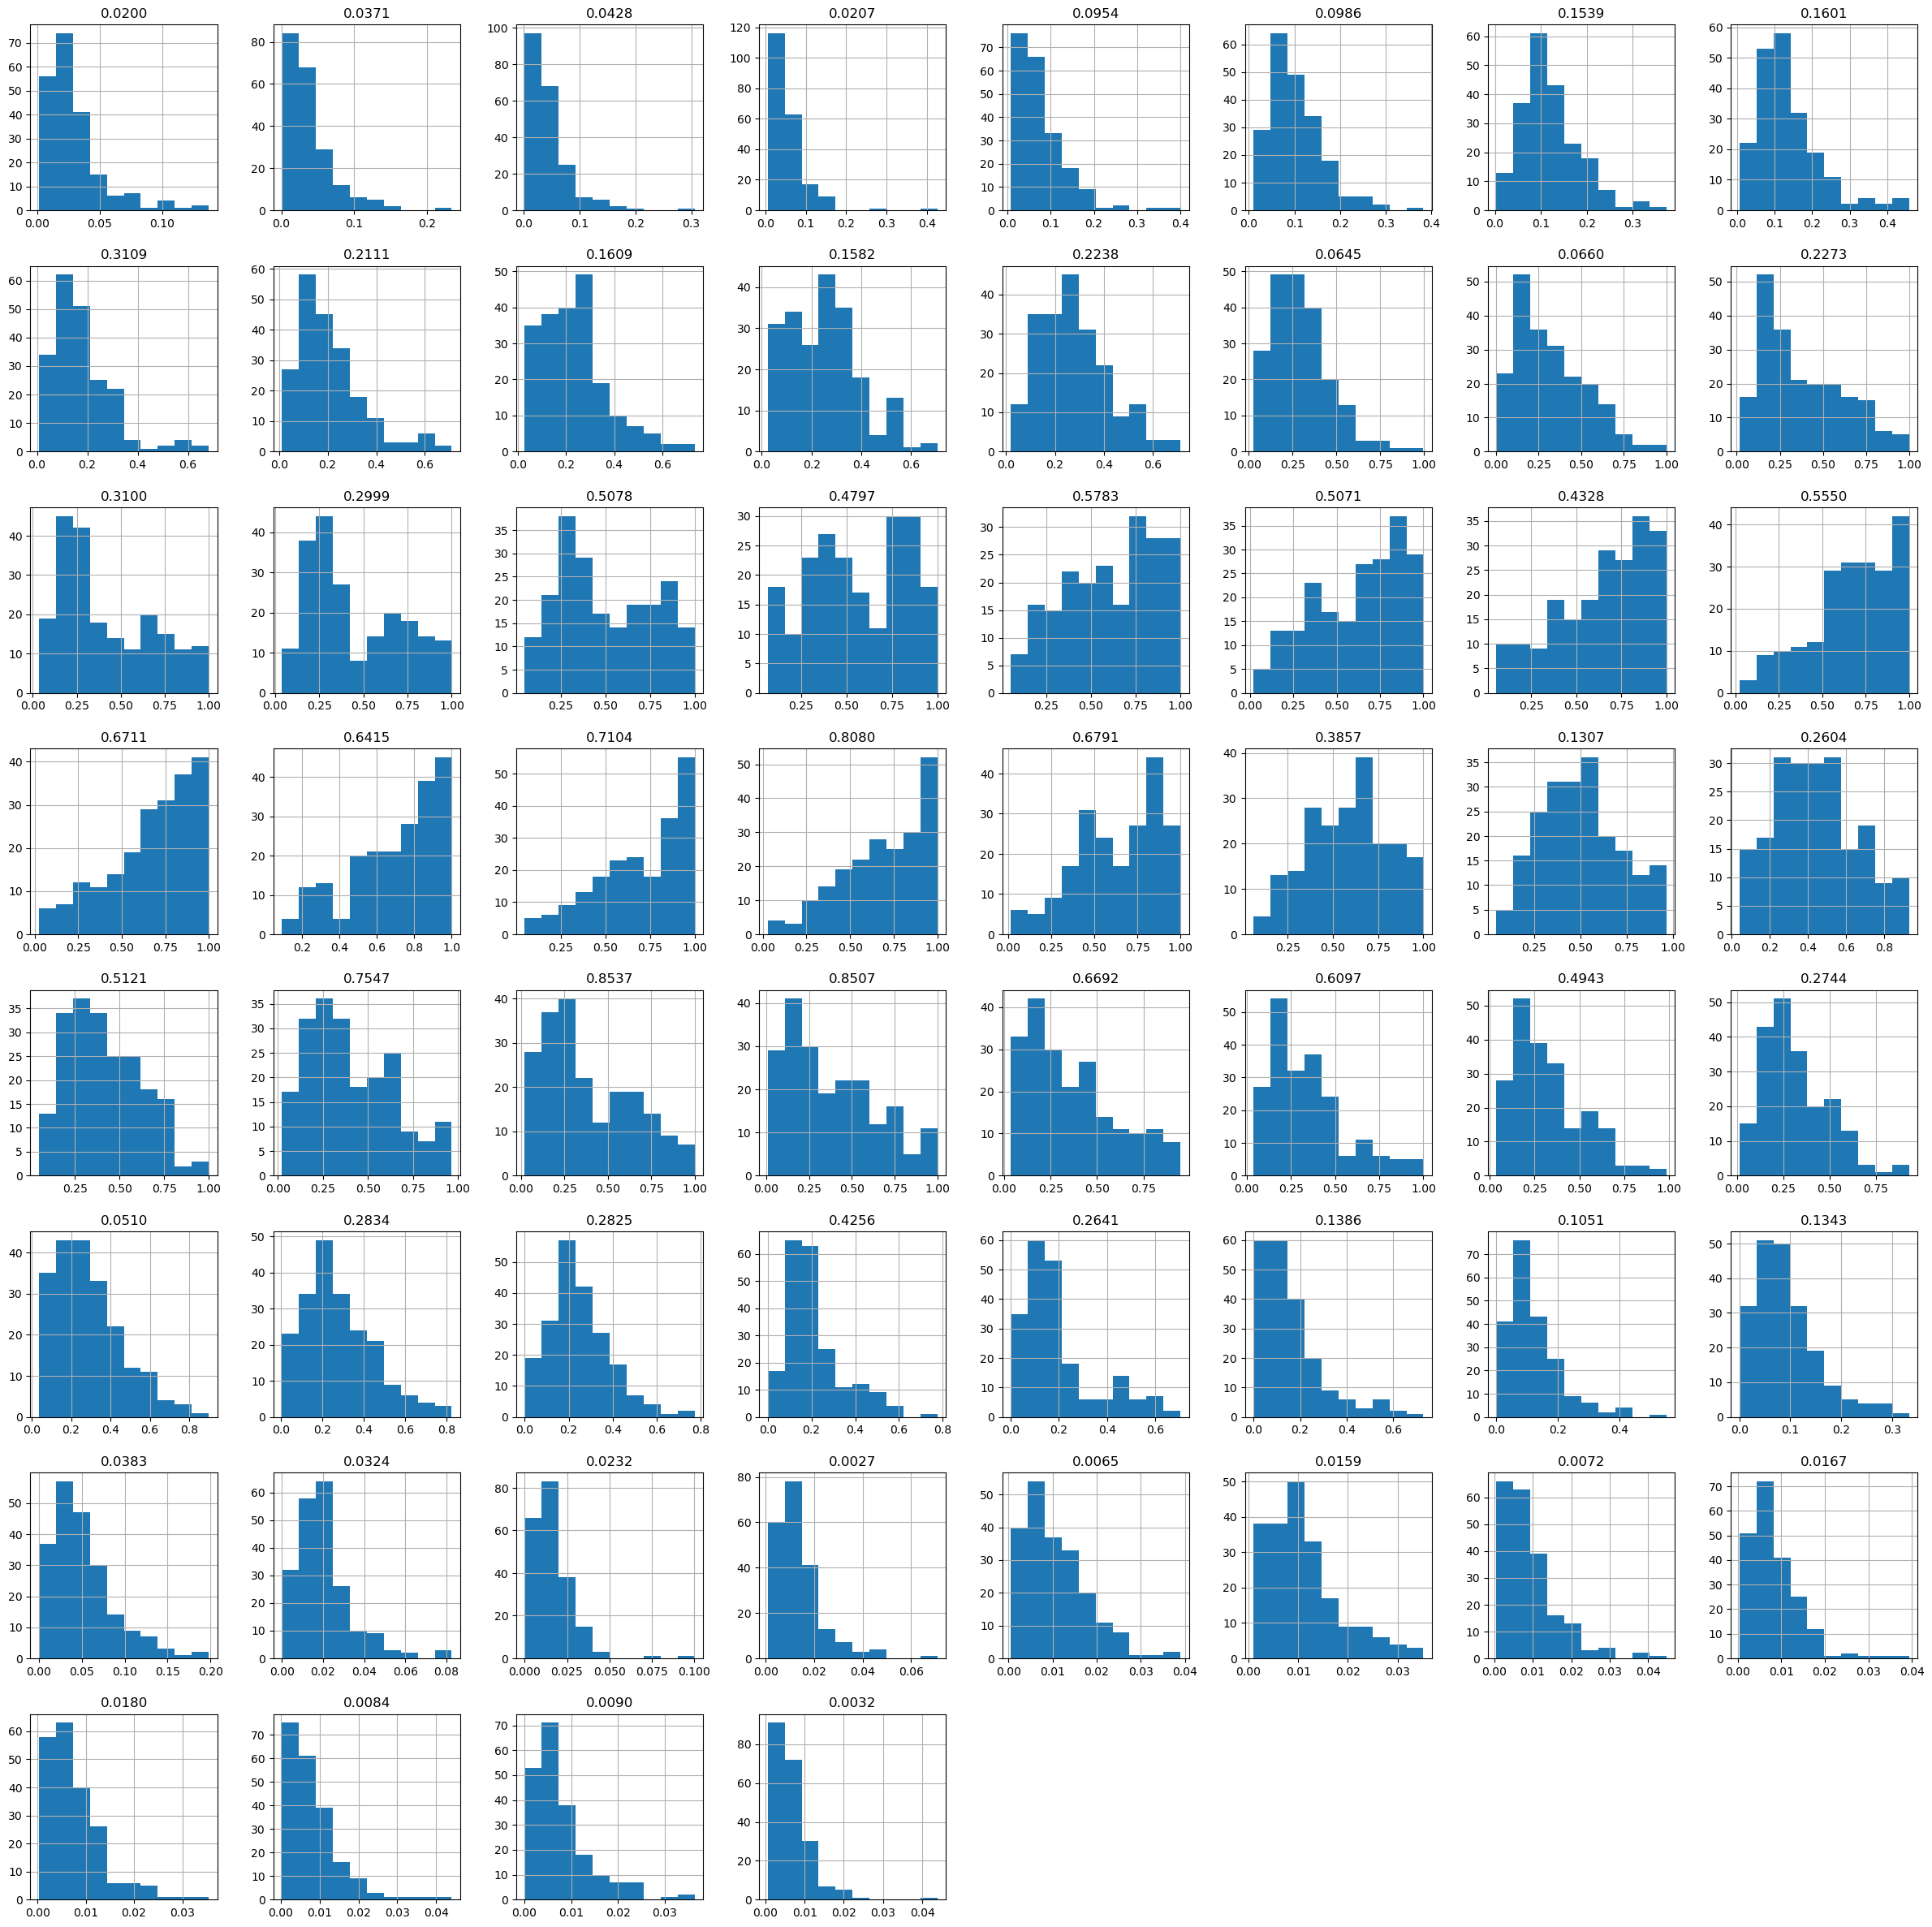

In [79]:
sonar_df.hist()
plt.show()

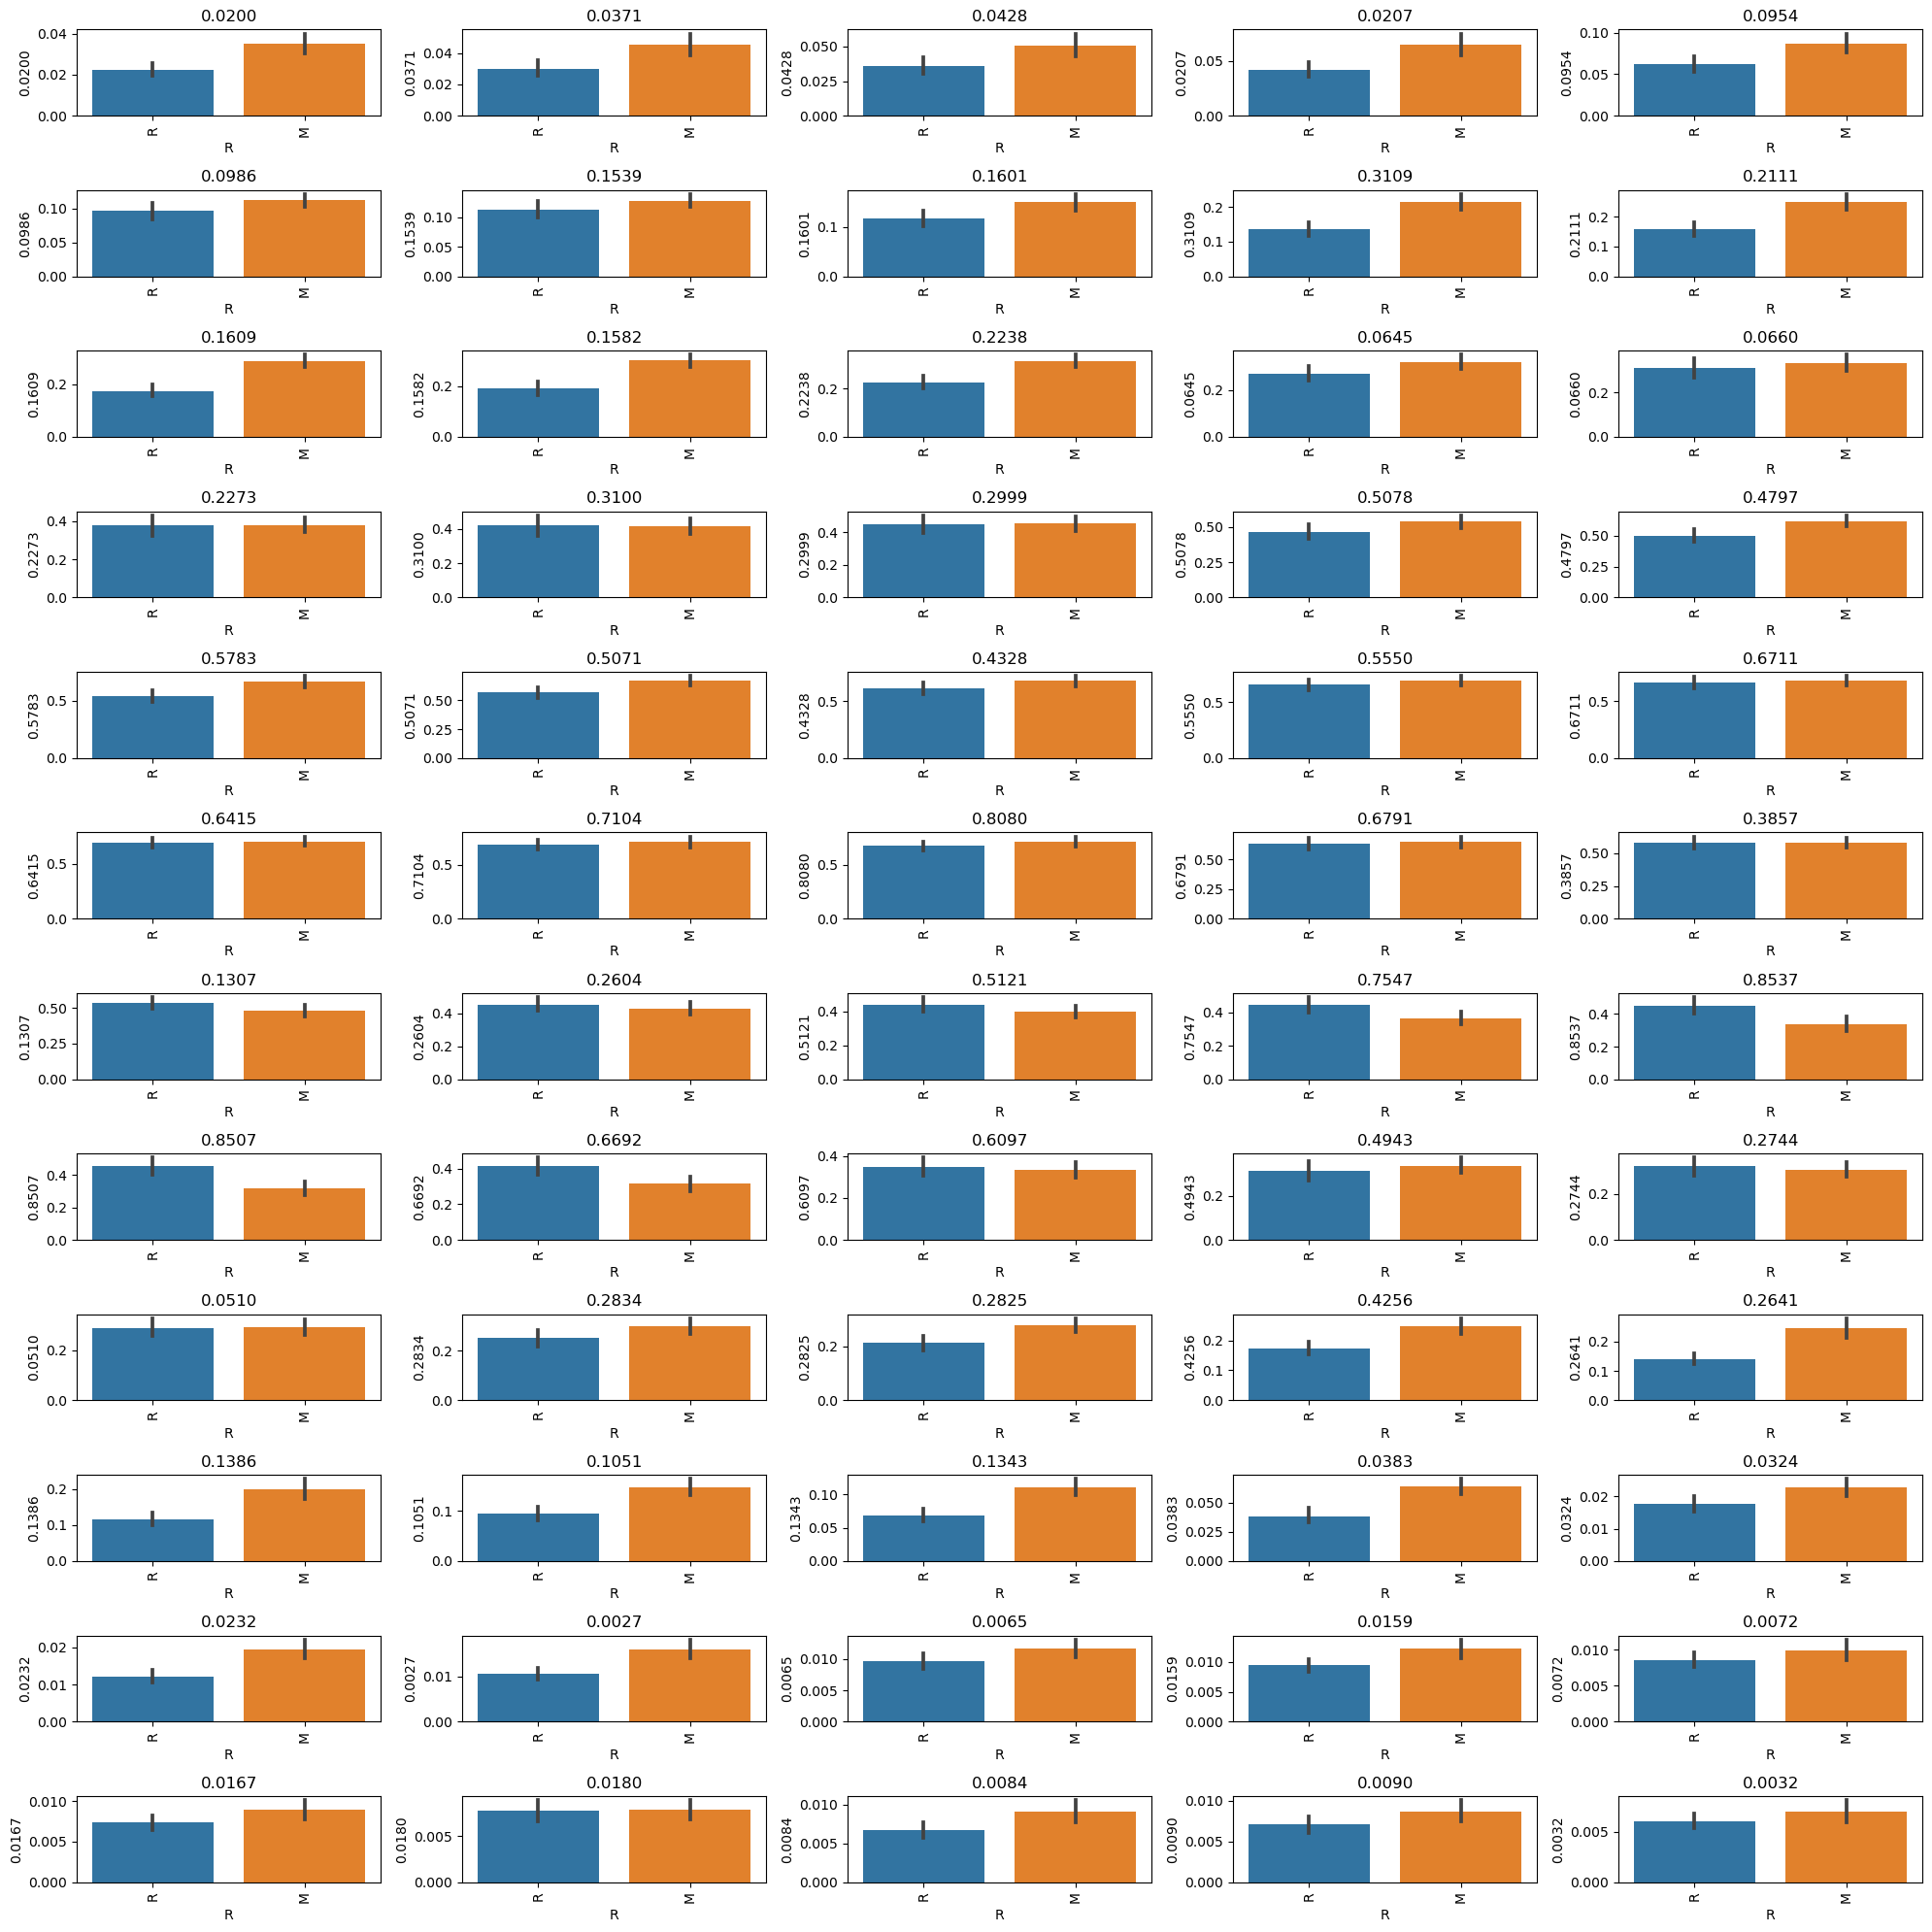

In [80]:
plt.rcParams['figure.figsize']=[20,20]
a-12
b=5
c=1
for i in num_cols:
    plt.subplot(a,b,c)
    sns.barplot(y=sonar_df[i],x=sonar_df['R'],data=sonar_df)
    c+=1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Count'>

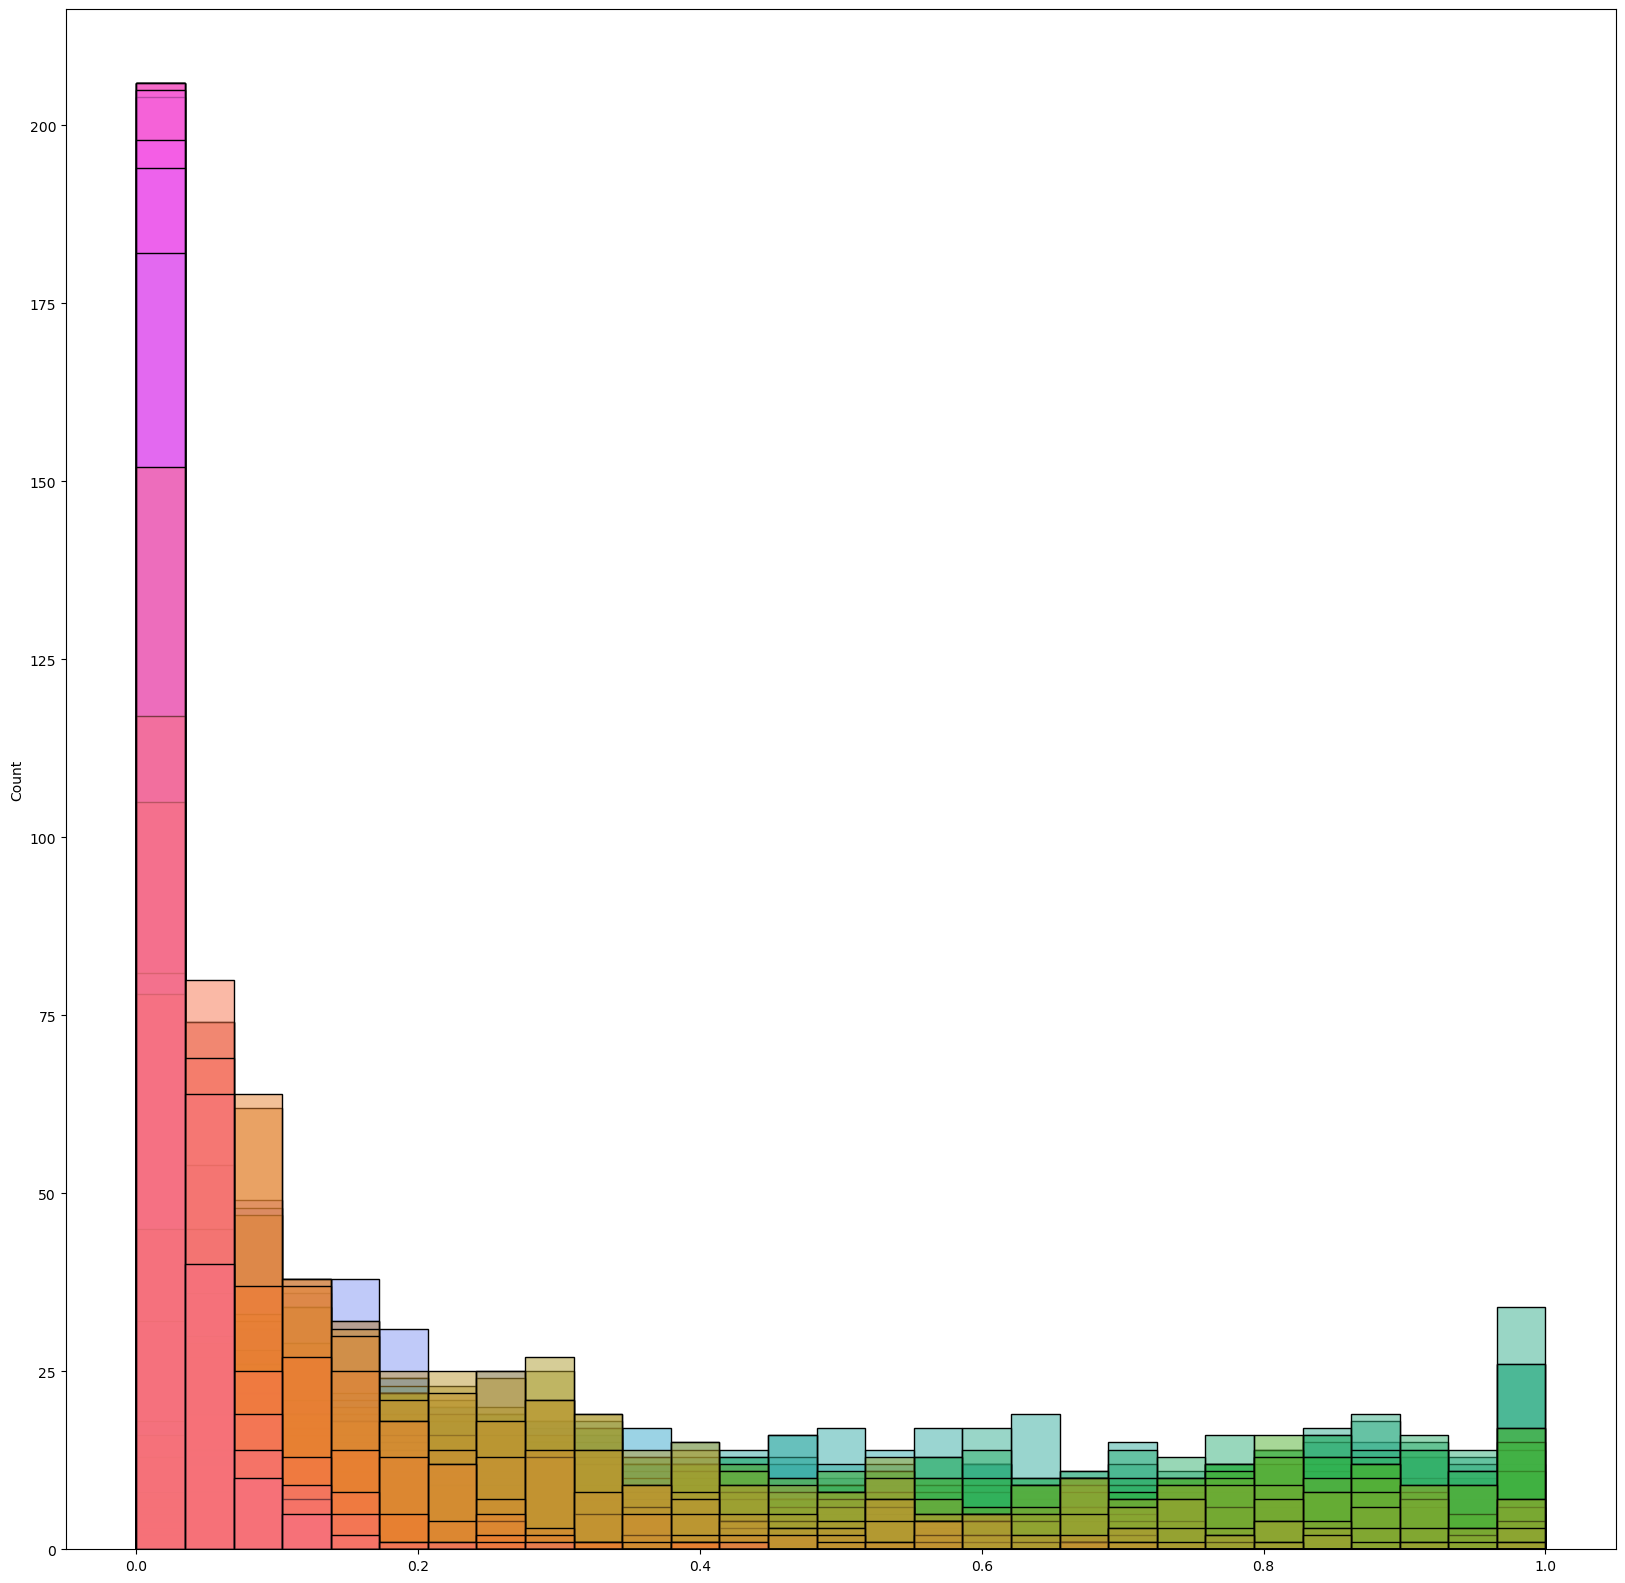

In [81]:
sns.histplot(data=sonar_df, legend=False)

In [82]:
mines_df=sonar_df[sonar_df['R']=='M']
mines_df

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
96   0.0491  0.0279  0.0592  0.1270  0.1772  0.1908  0.2217  0.0768  0.1246   
97   0.1313  0.2339  0.3059  0.4264  0.4010  0.1791  0.1853  0.0055  0.1929   
98   0.0201  0.0423  0.0554  0.0783  0.0620  0.0871  0.1201  0.2707  0.1206   
99   0.0629  0.1065  0.1526  0.1229  0.1437  0.1190  0.0884  0.0907  0.2107   
100  0.0335  0.0134  0.0696  0.1180  0.0348  0.1180  0.1948  0.1607  0.3036   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
96   0.2028  ...  0.0081  0.0129  0.0161  0.0063  0.0119  0.0194  0.0140   
97   0.2231  ...  0.0362  0.0210  0.0154  0.0180  0.0013  0.0106  0.0127   
98   0.0279  ...  0.0191  0.0182  0.0160  0.0290  0.0090  0.0242  0.0224   
99   0.3597  ...  0.0089  0.0262  0.0108  0.0138  0.0187  0.0230  0.0057   
100  0.4372  ...  0.0244  0.0232  0.0093  0.0159  0.0193  0.0032  0.0377   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
202  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
203  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
204  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
205  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
206  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

     0.0090  0.0032  R  
96   0.0332  0.0439  M  
97   0.0178  0.0231  M  
98   0.0190  0.0096  M  
99   0.0113  0.0131  M  
100  0.0126  0.0156  M  
..      ...     ... ..  
202  0.0193  0.0157  M  
203  0.0062  0.0067  M  
204  0.0077  0.0031  M  
205  0.0036  0.0048  M  
206  0.0061  0.0115  M  

[111 rows x 61 columns]

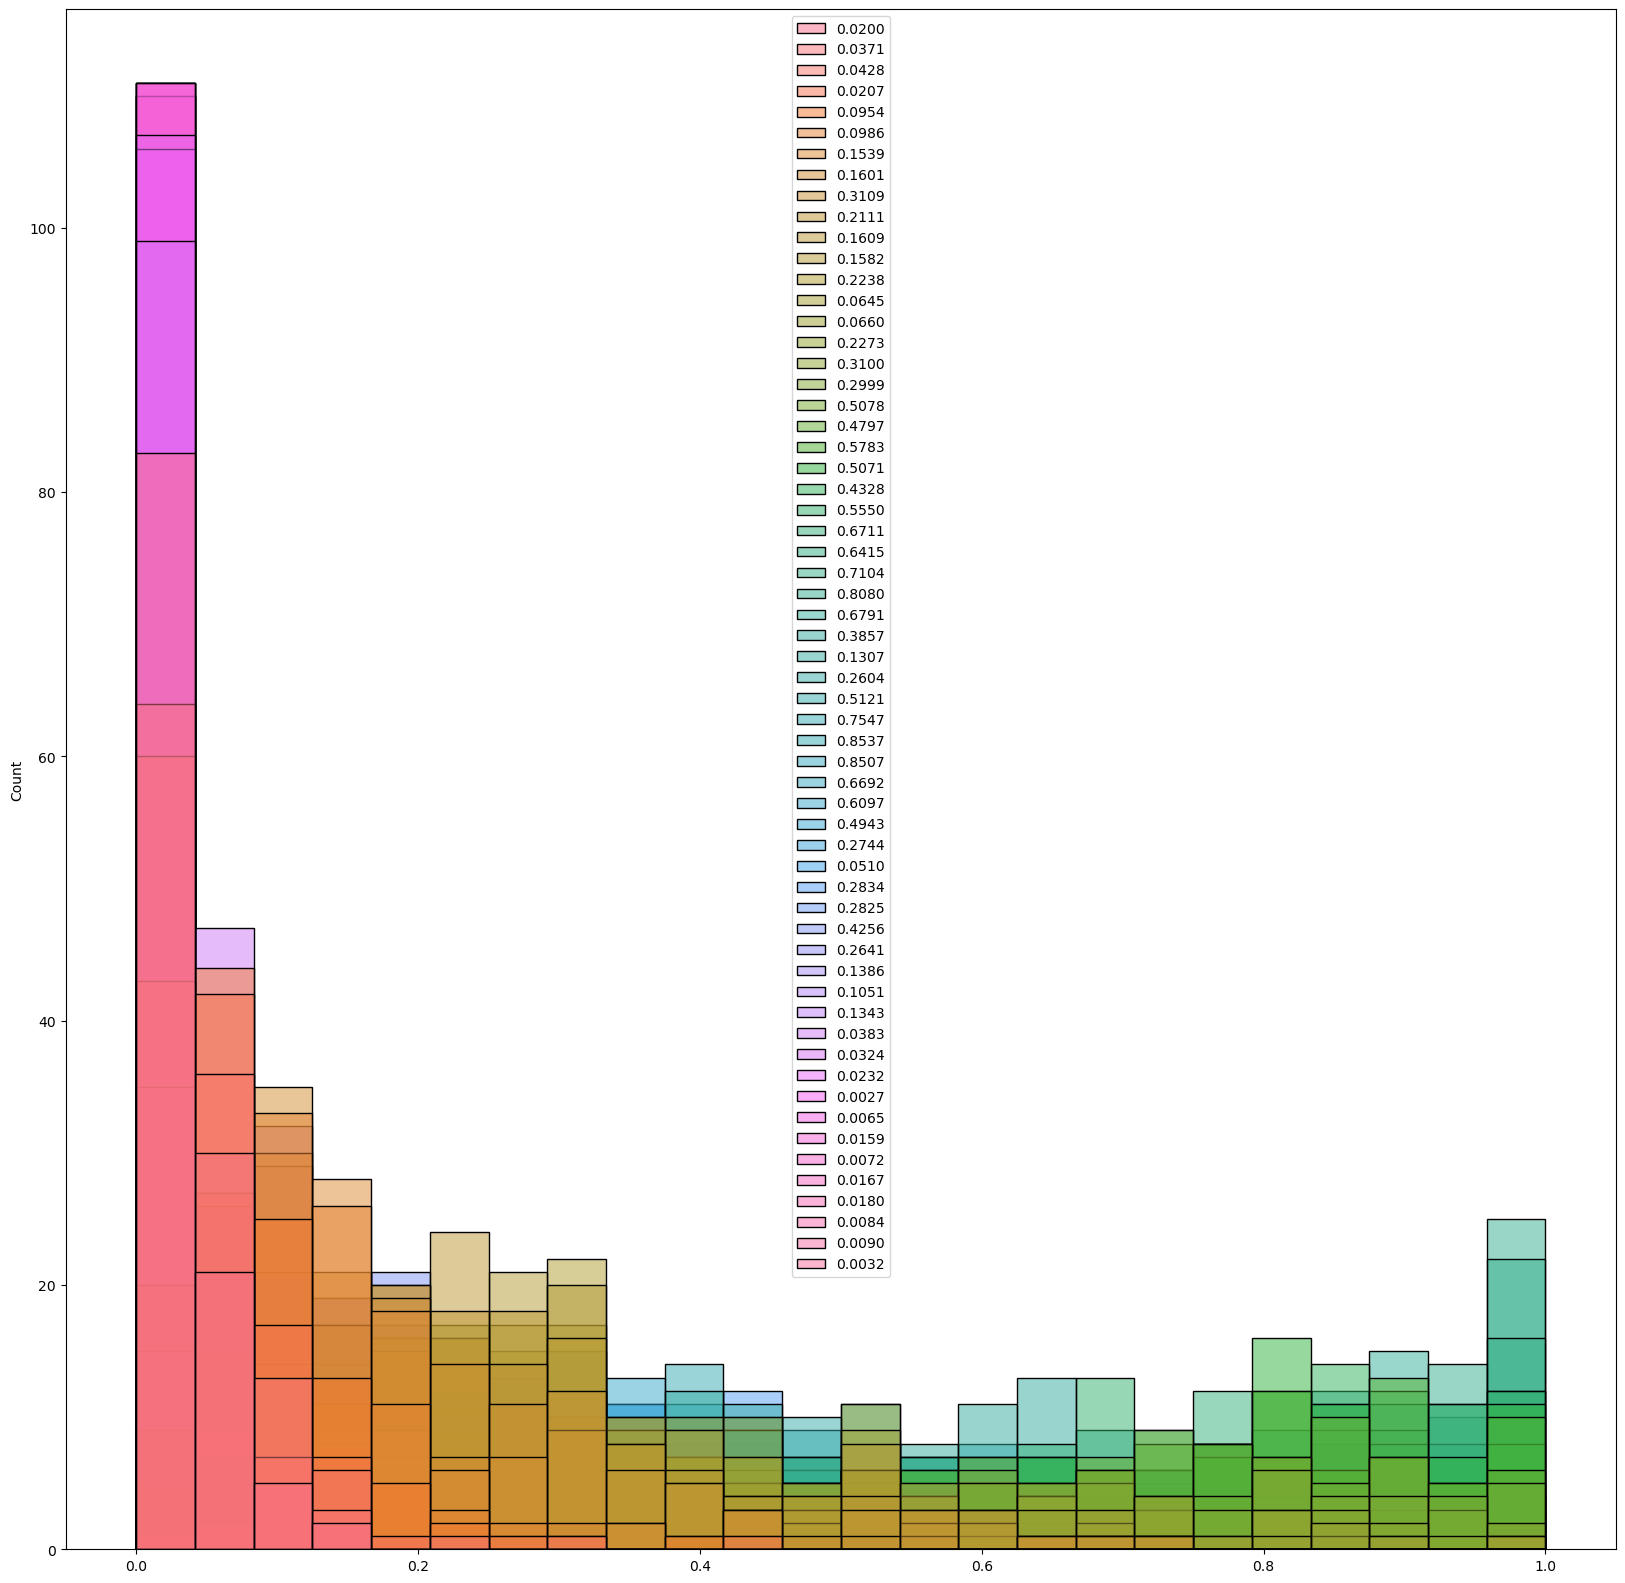

In [83]:
sns.histplot(data=mines_df)
plt.show()

In [84]:
rock_df=sonar_df[sonar_df['R']=='R']
rock_df

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
91  0.0260  0.0192  0.0254  0.0061  0.0352  0.0701  0.1263  0.1080  0.1523   
92  0.0459  0.0437  0.0347  0.0456  0.0067  0.0890  0.1798  0.1741  0.1598   
93  0.0025  0.0309  0.0171  0.0228  0.0434  0.1224  0.1947  0.1661  0.1368   
94  0.0291  0.0400  0.0771  0.0809  0.0521  0.1051  0.0145  0.0674  0.1294   
95  0.0181  0.0146  0.0026  0.0141  0.0421  0.0473  0.0361  0.0741  0.1398   

    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0   0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1   0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2   0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3   0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4   0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   
..     ...  ...     ...     ...     ...     ...     ...     ...     ...   
91  0.1630  ...  0.0118  0.0120  0.0051  0.0070  0.0015  0.0035  0.0008   
92  0.1408  ...  0.0067  0.0032  0.0109  0.0164  0.0151  0.0070  0.0085   
93  0.1430  ...  0.0149  0.0077  0.0036  0.0114  0.0085  0.0101  0.0016   
94  0.1146  ...  0.0056  0.0237  0.0204  0.0050  0.0137  0.0164  0.0081   
95  0.1045  ...  0.0223  0.0255  0.0145  0.0233  0.0041  0.0018  0.0048   

    0.0090  0.0032  R  
0   0.0052  0.0044  R  
1   0.0095  0.0078  R  
2   0.0040  0.0117  R  
3   0.0107  0.0094  R  
4   0.0051  0.0062  R  
..     ...     ... ..  
91  0.0044  0.0077  R  
92  0.0117  0.0056  R  
93  0.0028  0.0014  R  
94  0.0139  0.0111  R  
95  0.0089  0.0085  R  

[96 rows x 61 columns]

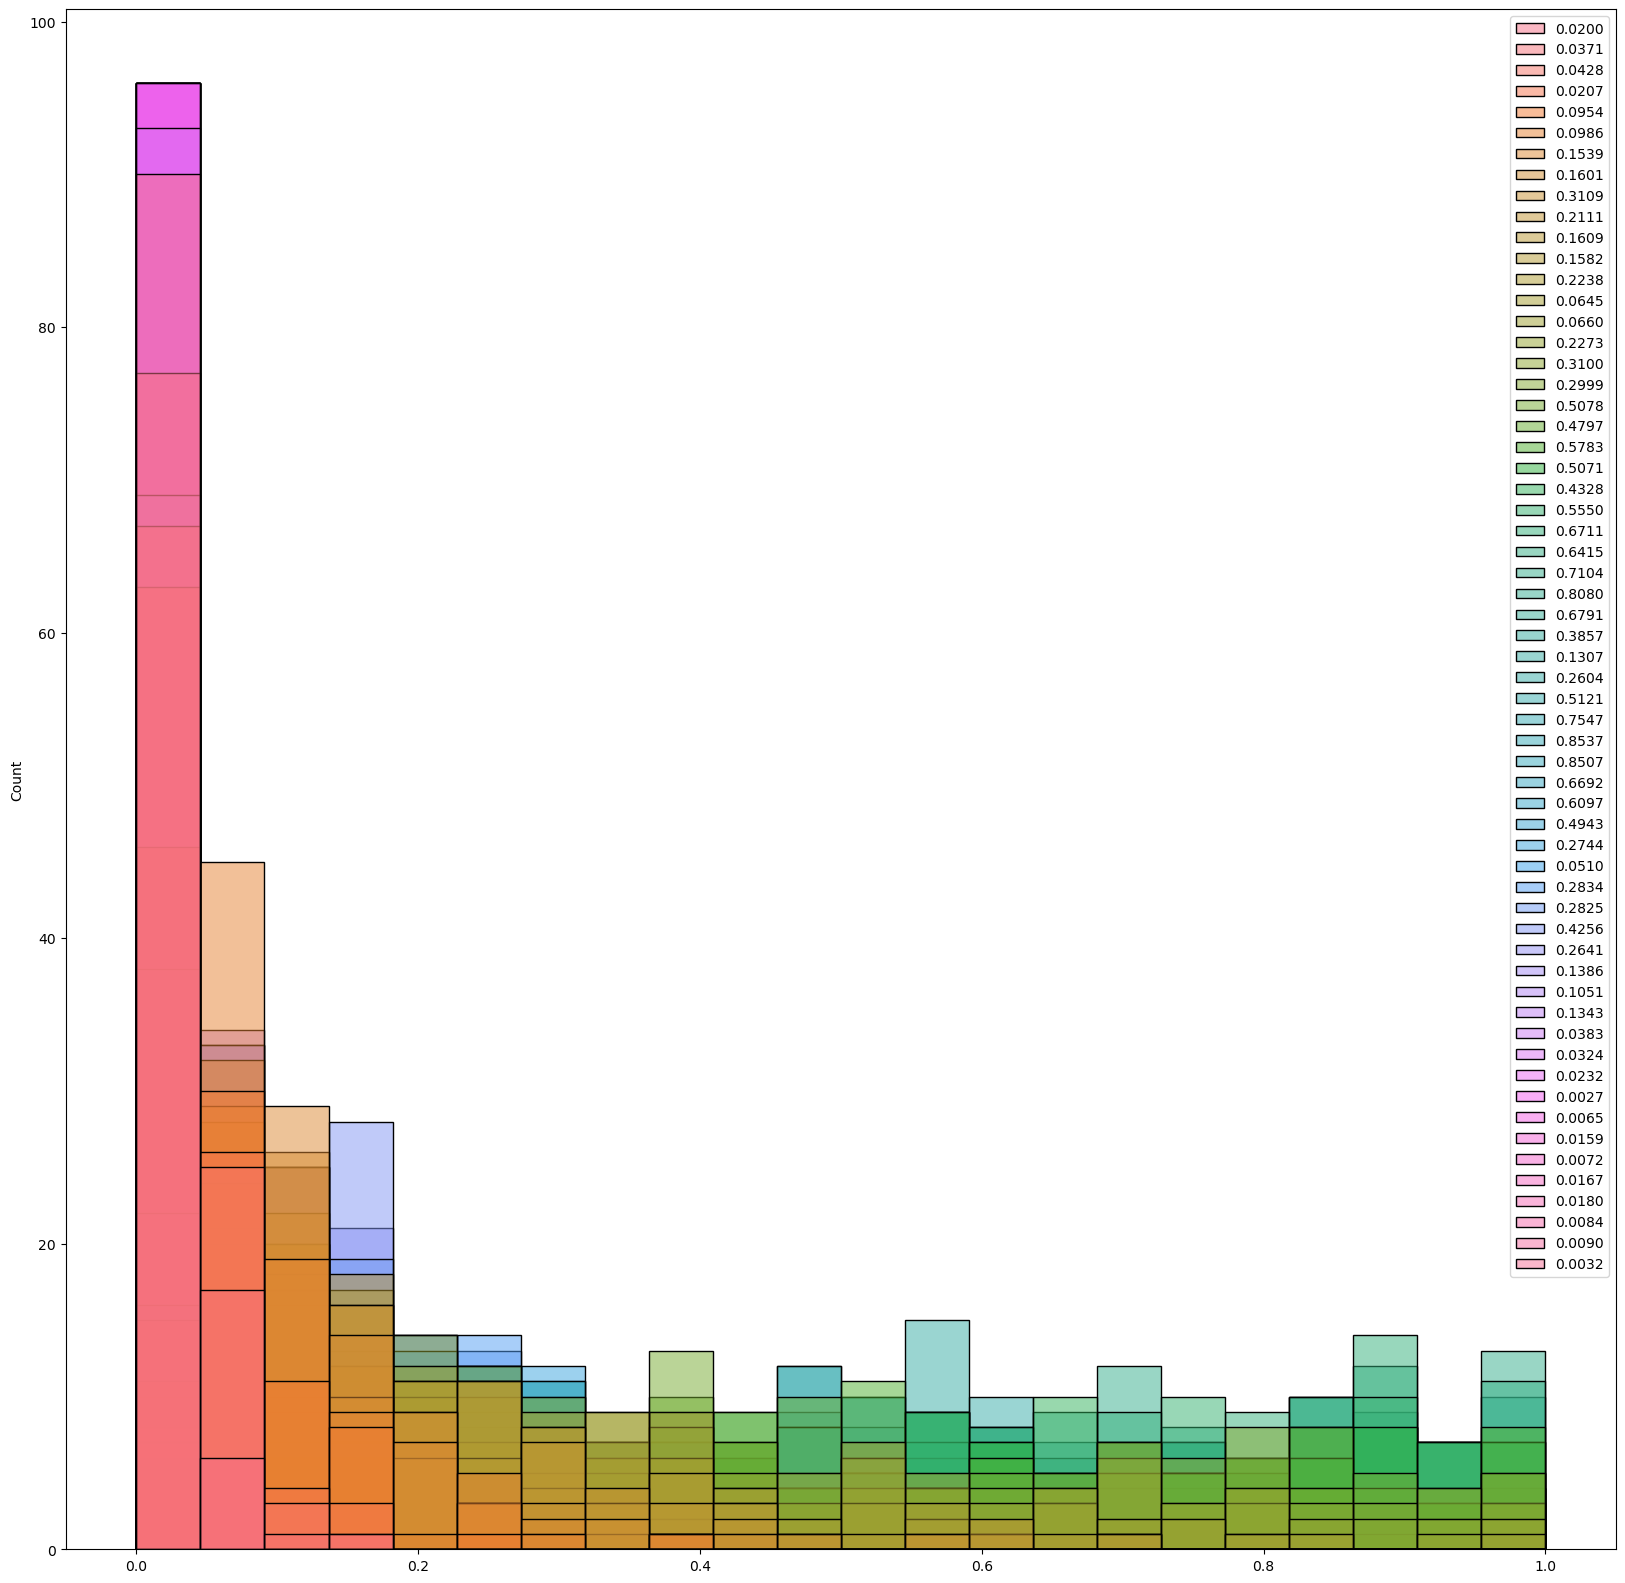

In [85]:
sns.histplot(data=rock_df)
plt.show()

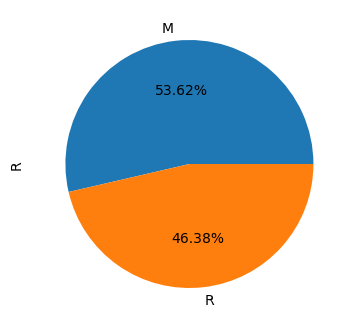

In [86]:
# checking data balancing
plt.rcParams['figure.figsize']=[4,5]
sonar_df.R.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

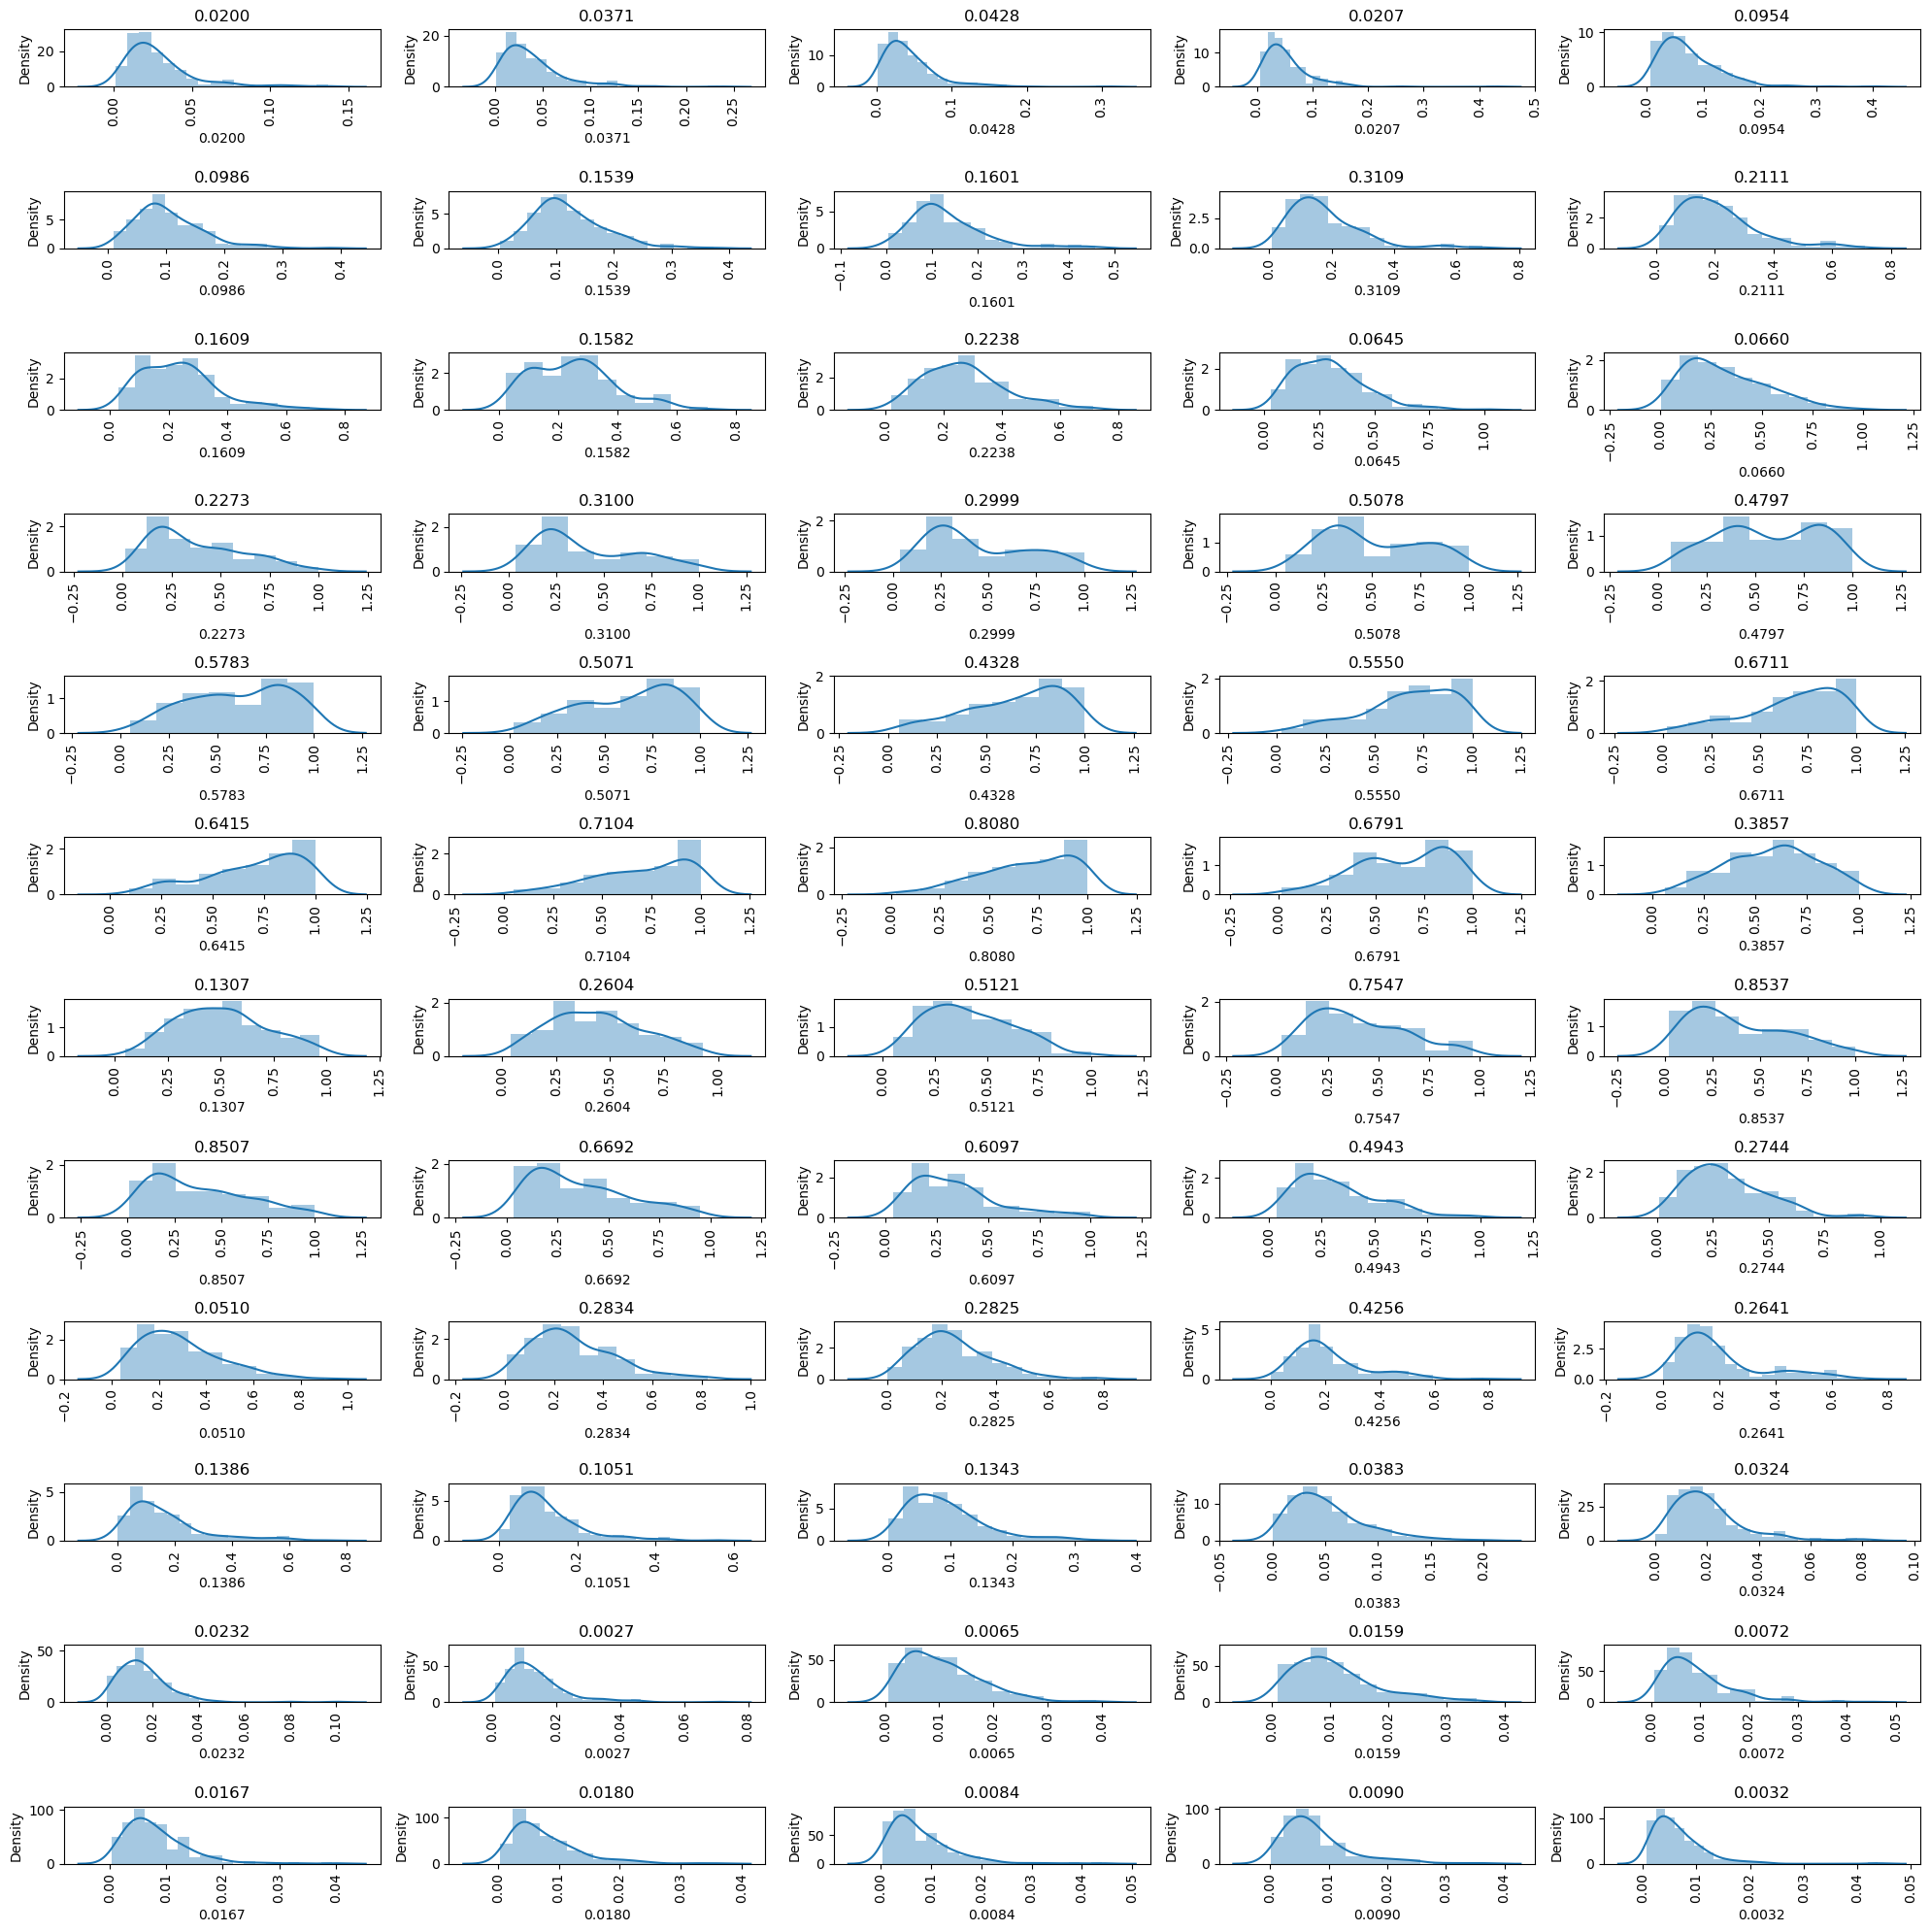

In [87]:
# checking skewness
plt.rcParams['figure.figsize']=[20,20]
a=12
b=5
c=1
for i in num_cols:
    
    plt.subplot(a,b,c)
    sns.distplot(sonar_df[i])
    c+=1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [88]:
# skewness
sonar_df.skew().to_dict()

{'0.0200': 2.122983492783538,
 '0.0371': 2.149965444200083,
 '0.0428': 2.6458489727414034,
 '0.0207': 3.397590267310483,
 '0.0954': 2.0203691626091826,
 '0.0986': 1.2438284888891717,
 '0.1539': 0.9773456280148416,
 '0.1601': 1.4827552875269754,
 '0.3109': 1.6545575550852953,
 '0.2111': 1.2785324480617486,
 '0.1609': 0.9803884478521404,
 '0.1582': 0.580918376491514,
 '0.2238': 0.7305802648462077,
 '0.0645': 1.0280812199577989,
 '0.0660': 0.7619214166026484,
 '0.2273': 0.6870026504260247,
 '0.3100': 0.6481428630474124,
 '0.2999': 0.518348609281832,
 '0.5078': 0.2826801315638249,
 '0.4797': -0.08966956477850145,
 '0.5783': -0.2539015161819994,
 '0.5071': -0.3981779216861765,
 '0.4328': -0.6055694047388746,
 '0.5550': -0.6980454064013183,
 '0.6711': -0.7872971906814693,
 '0.6415': -0.6738026768825337,
 '0.7104': -0.6258692699649233,
 '0.8080': -0.6085425665166405,
 '0.6791': -0.4388027696871941,
 '0.3857': -0.14238186854942814,
 '0.1307': 0.26587482557190745,
 '0.2604': 0.3049059260182872,

there are categorical two output in target variable so we will use binary classification for modeling

In [89]:
sonar_df.R

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: R, Length: 207, dtype: object

In [90]:
# model without scaling

In [101]:
sonar_df

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4    0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
202  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
203  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
204  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
205  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
206  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

     0.0090  0.0032  R  
0    0.0052  0.0044  0  
1    0.0095  0.0078  0  
2    0.0040  0.0117  0  
3    0.0107  0.0094  0  
4    0.0051  0.0062  0  
..      ...     ... ..  
202  0.0193  0.0157  1  
203  0.0062  0.0067  1  
204  0.0077  0.0031  1  
205  0.0036  0.0048  1  
206  0.0061  0.0115  1  

[207 rows x 61 columns]

In [102]:
sonar_df.replace(['R','M'],[0,1],inplace=True)

In [103]:
X=sonar_df.drop(columns='R',axis=1)
Y=sonar_df.R

In [104]:
X

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  \
0    0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
1    0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
2    0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
3    0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   
4    0.3039  ...  0.0104  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
202  0.2684  ...  0.0203  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065   
203  0.2154  ...  0.0051  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034   
204  0.2529  ...  0.0155  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140   
205  0.2354  ...  0.0042  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034   
206  0.2354  ...  0.0181  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040   

     0.0084  0.0090  0.0032  
0    0.0049  0.0052  0.0044  
1    0.0164  0.0095  0.0078  
2    0.0044  0.0040  0.0117  
3    0.0048  0.0107  0.0094  
4    0.0027  0.0051  0.0062  
..      ...     ...     ...  
202  0.0115  0.0193  0.0157  
203  0.0032  0.0062  0.0067  
204  0.0138  0.0077  0.0031  
205  0.0079  0.0036  0.0048  
206  0.0036  0.0061  0.0115  

[207 rows x 60 columns]

In [105]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
202    1
203    1
204    1
205    1
206    1
Name: R, Length: 207, dtype: int64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)


0      0
1      0
2      0
3      0
4      0
      ..
202    1
203    1
204    1
205    1
206    1
Name: R, Length: 207, dtype: int64

In [108]:
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [110]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)


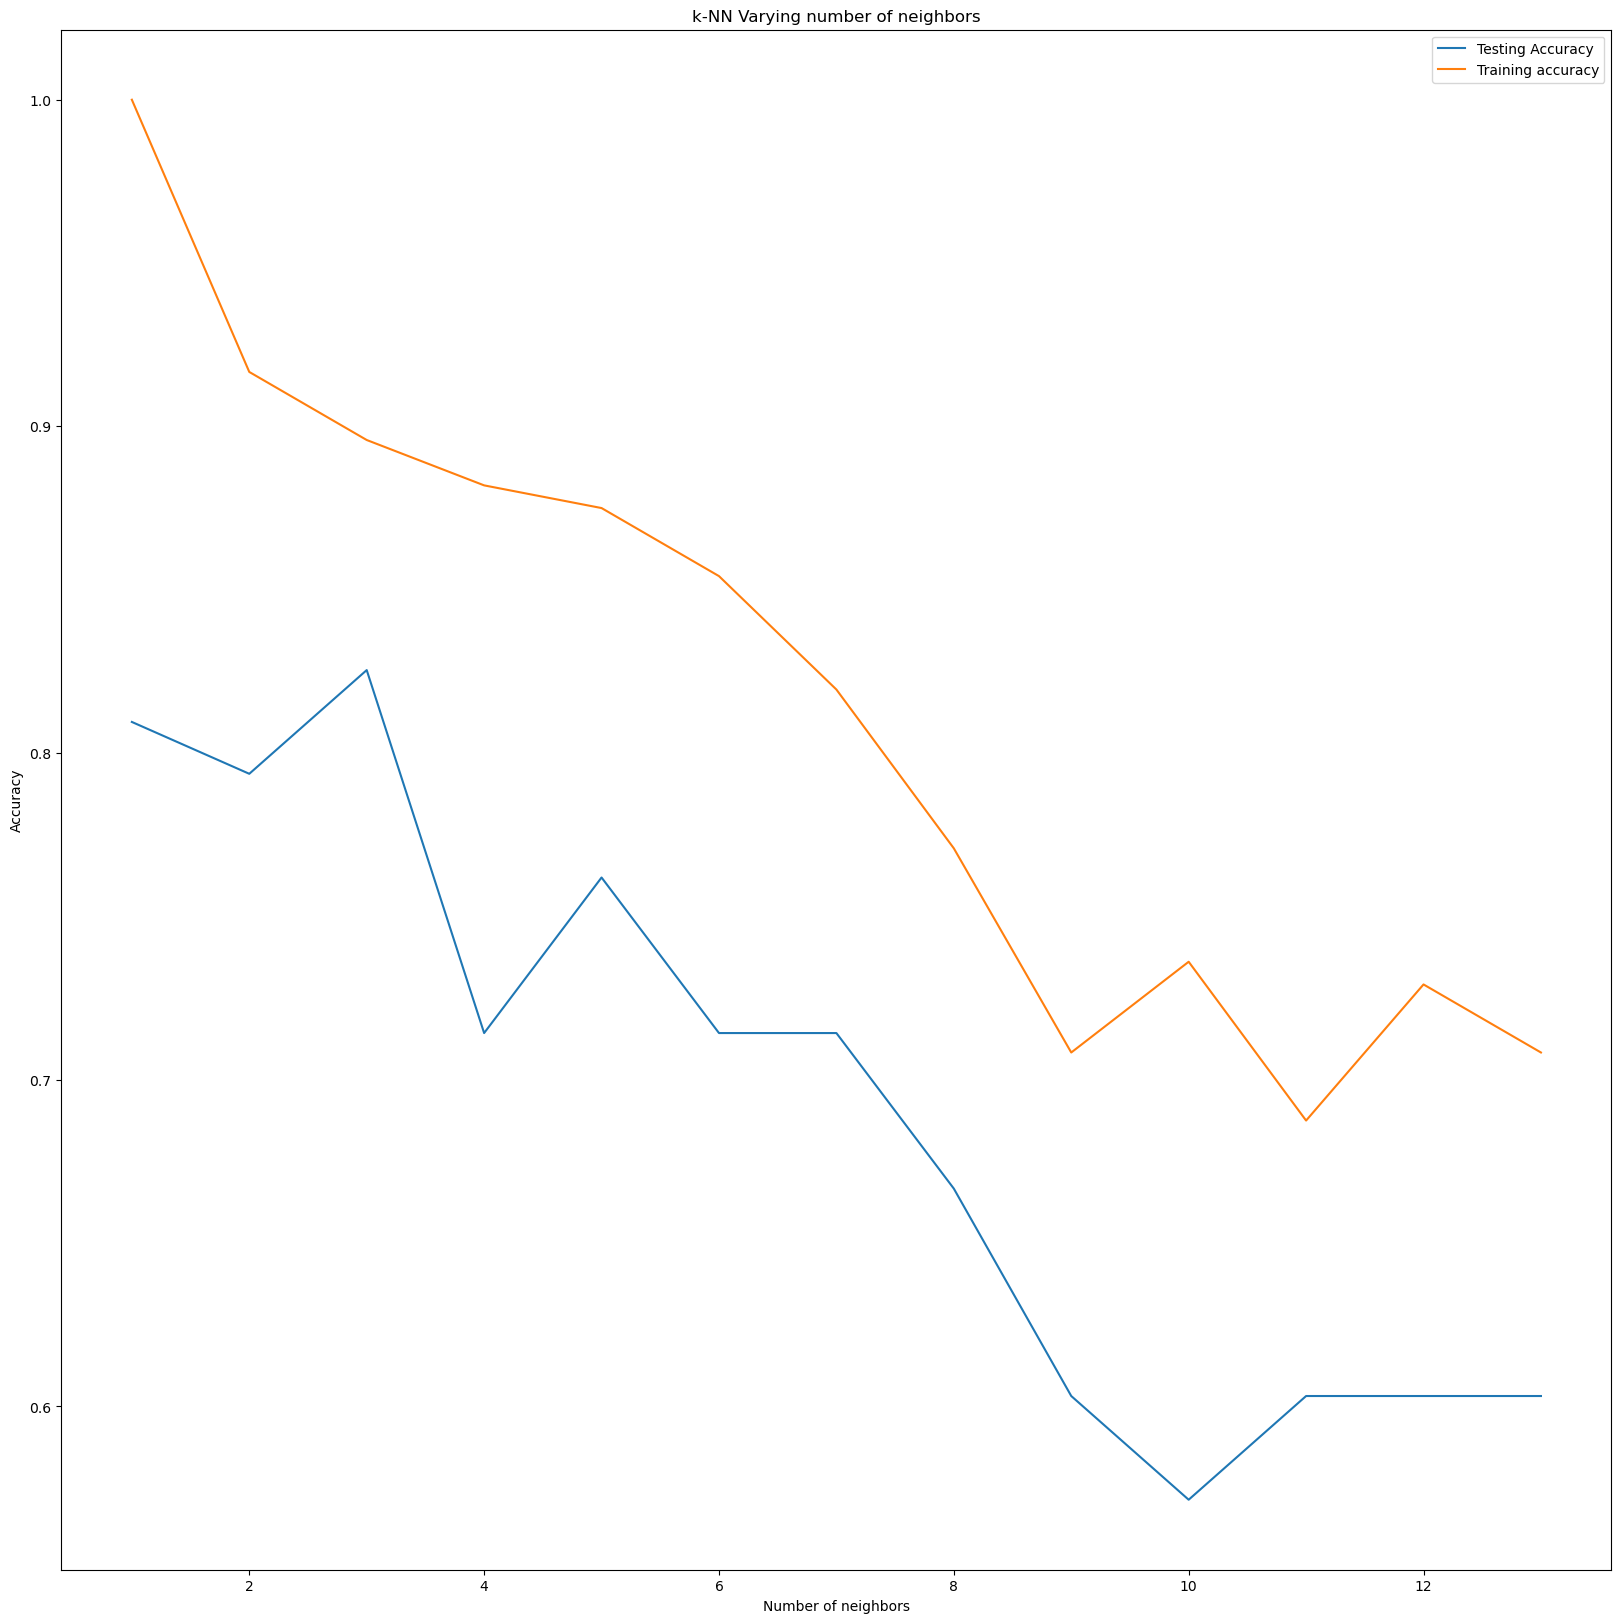

In [111]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [112]:
knn = KNeighborsClassifier(n_neighbors=2)

In [113]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [114]:
y_pred = knn.predict(X_test)


In [115]:
print(X.shape,X_train.shape,X_test.shape)


(207, 60) (144, 60) (63, 60)


In [116]:
print(X_train)
print(y_train)


     0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
146  0.0654  0.0649  0.0737  0.1132  0.2482  0.1257  0.1797  0.0989  0.2460   
108  0.0264  0.0071  0.0342  0.0793  0.1043  0.0783  0.1417  0.1176  0.0453   
176  0.0201  0.0165  0.0344  0.0330  0.0397  0.0443  0.0684  0.0903  0.1739   
31   0.0195  0.0213  0.0058  0.0190  0.0319  0.0571  0.1004  0.0668  0.0691   
12   0.0090  0.0062  0.0253  0.0489  0.1197  0.1589  0.1392  0.0987  0.0955   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
106  0.0428  0.0555  0.0708  0.0618  0.1215  0.1524  0.1543  0.0391  0.0610   
14   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
92   0.0459  0.0437  0.0347  0.0456  0.0067  0.0890  0.1798  0.1741  0.1598   
179  0.0310  0.0221  0.0433  0.0191  0.0964  0.1827  0.1106  0.1702  0.2804   
102  0.0162  0.0253  0.0262  0.0386  0.0645  0.0472  0.1056  0.1388  0.0598   

     0.2111  ...  0.0232  0.0027  0.0065  0.0159  0

In [117]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [118]:
knn.score(X_test,y_test)

0.7936507936507936

In [119]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted   0   1  All
True                  
0          24   3   27
1          10  26   36
All        34  29   63

In [120]:
score=model.score(X_test,y_test)
print(score)

0.746031746031746


In [121]:
prediction=model.predict(X_test)

In [122]:
pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   0   1  All
True                  
0          23   4   27
1          12  24   36
All        35  28   63

In [124]:
training_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

In [125]:
training_score = round(accuracy_score(training_predict,y_train)*100,4)
test_score = round(accuracy_score(test_predict,y_test)*100,4)

In [126]:
print(f"Accuracy on training dataset: {training_score}%")
print(f"Accuracy on testing dataset: {test_score}%")

Accuracy on training dataset: 91.6667%
Accuracy on testing dataset: 79.3651%


In [127]:
#Classification Report
print(classification_report(y_train,training_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        69
           1       1.00      0.84      0.91        75

    accuracy                           0.92       144
   macro avg       0.93      0.92      0.92       144
weighted avg       0.93      0.92      0.92       144



In [128]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.90      0.72      0.80        36

    accuracy                           0.79        63
   macro avg       0.80      0.81      0.79        63
weighted avg       0.81      0.79      0.79        63

